In [2]:
%load_ext autoreload
%autoreload 2
from generators import DiagBooleanMatrix, ArbiBooleanMatrix

In [3]:
# # generate diagonal Boolean matrix

# n_row=200
# n_col=100
# k=5
# overlap=[0.2, 0.1, 0.2, 0.1]
# noise=[0.3, 0.1]

# X = DiagBooleanMatrix(m=n_row, n=n_col, k=k, overlap=overlap)
# X.generate()
# X.add_noise(noise=noise, seed=1024)
# X.show_matrix(title="diagonal boolean matrix")

In [11]:
import numpy as np
a = np.array([[1], [2]])
a.sum(axis=0)

array([3])

[I] m            : 2000
[I] n            : 1000
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 2023
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


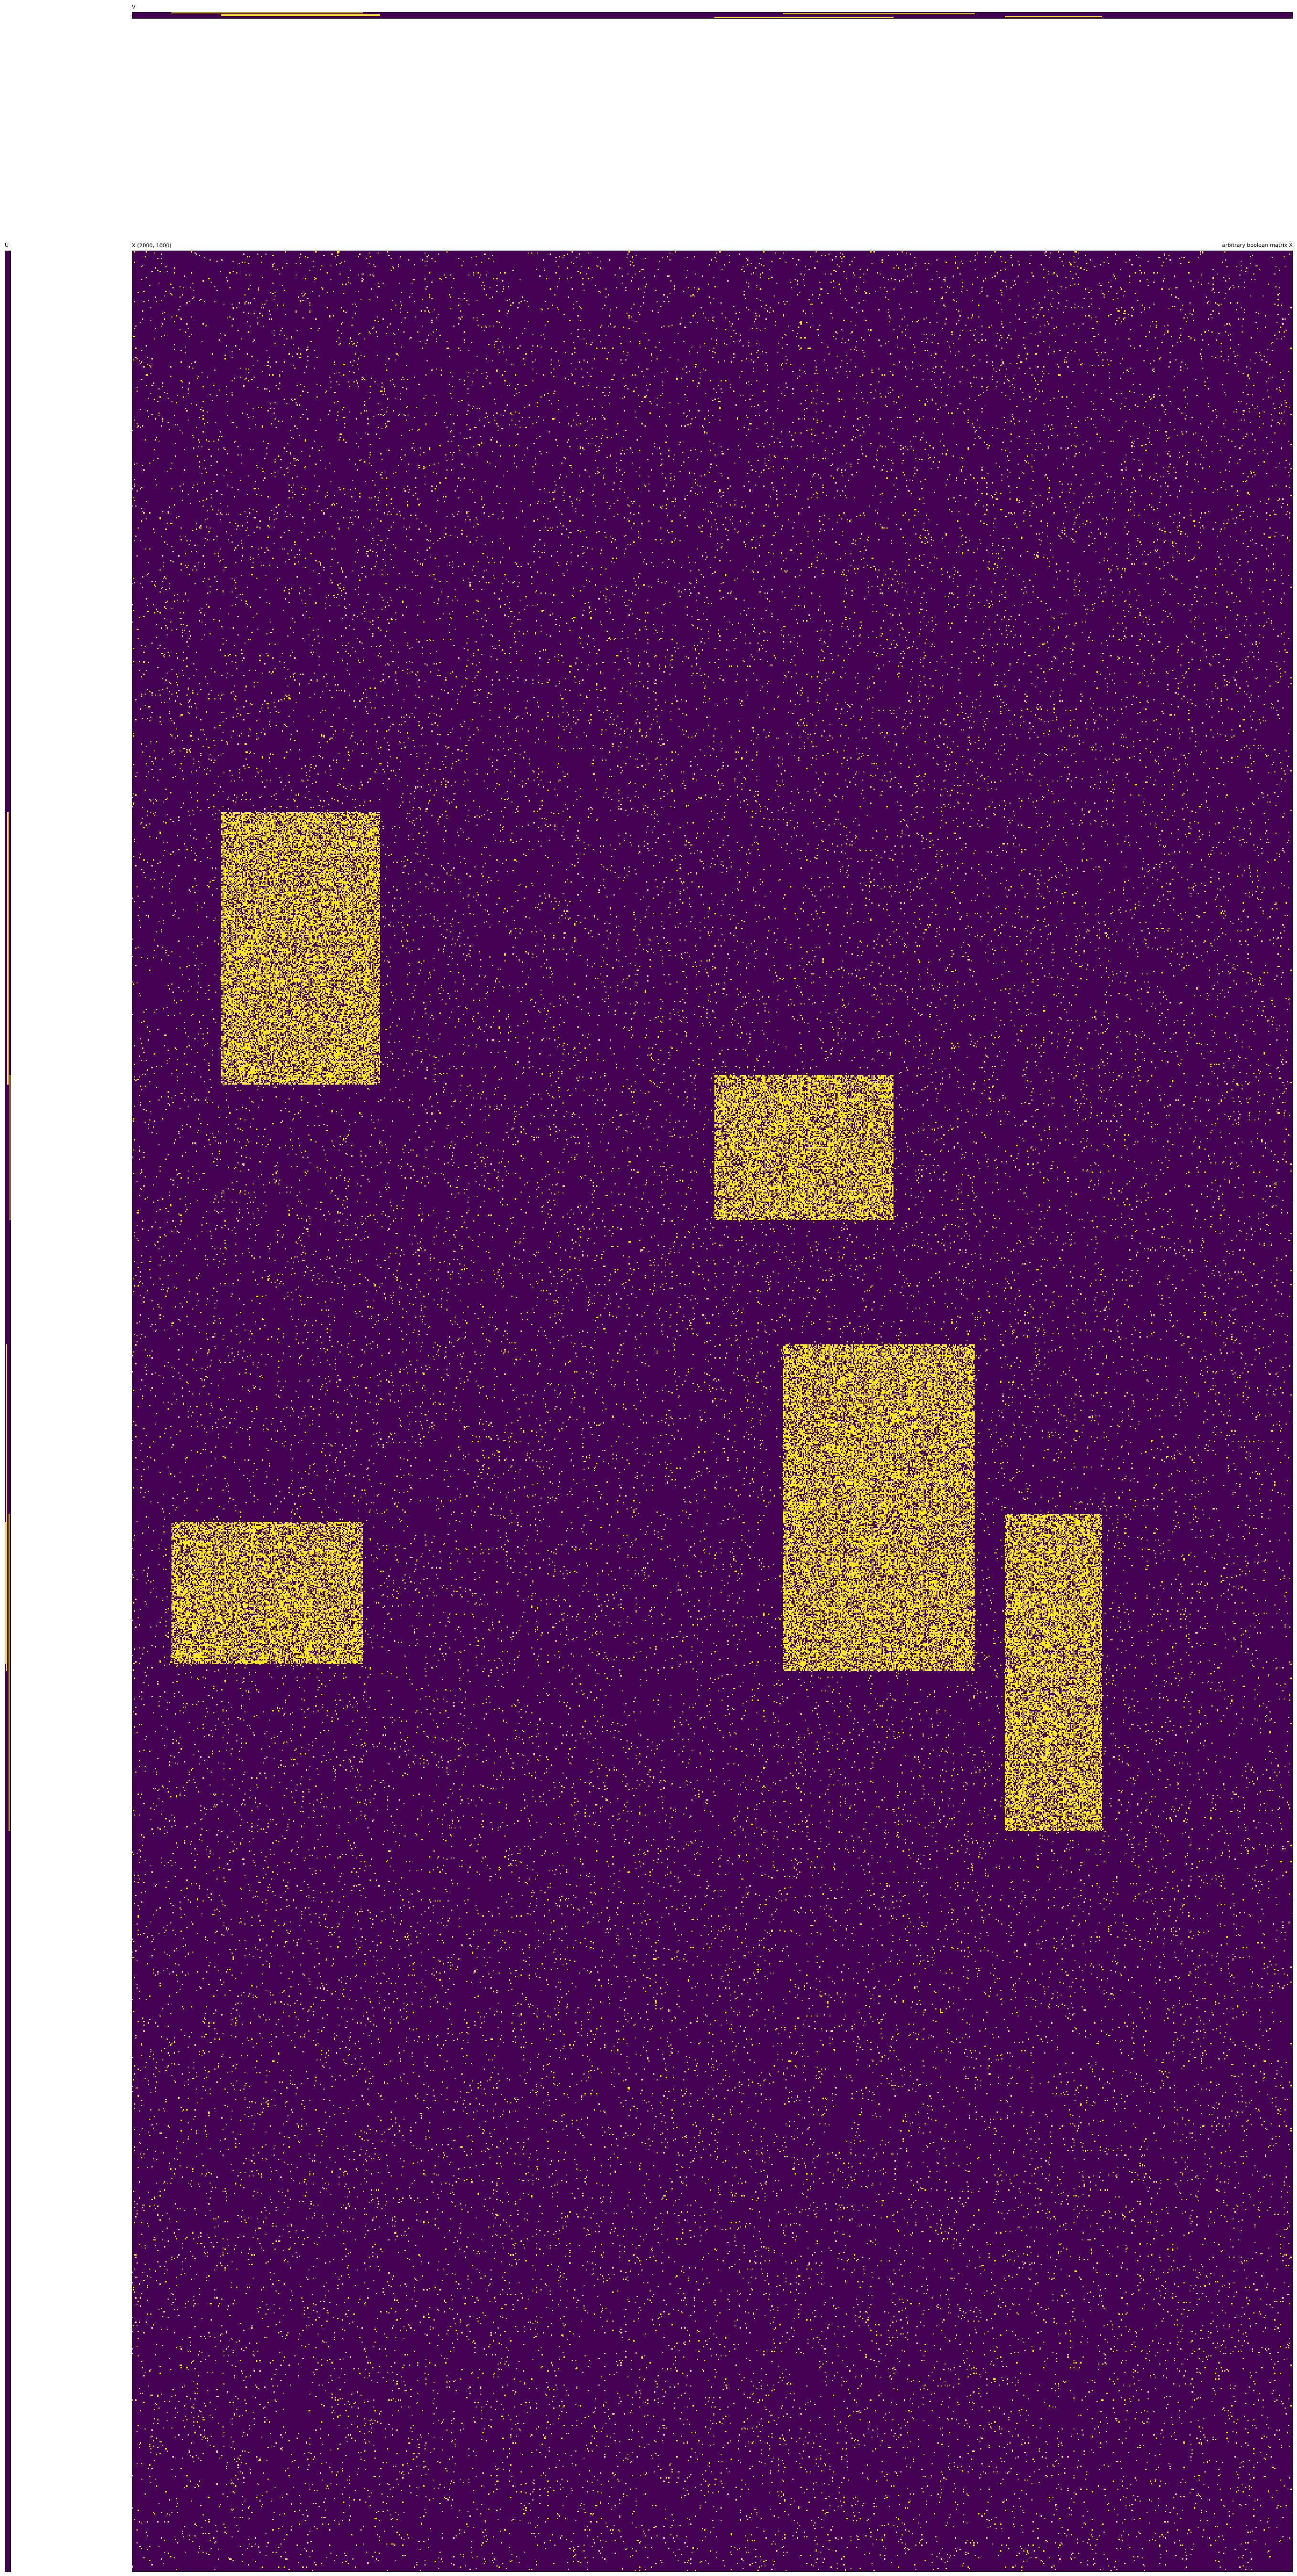

[I] m            : 200
[I] n            : 1000
[I] k            : 5
[I] overlap      : [0.2 0.1 0.2 0.1]
[I] seed         : 1997
[I] seed         : 2023
[I] Using RandomState.
[I] Using RandomState.
[I] noise        : [0.3 0.1]
[I] seed         : 1024
[I] Using RandomState.


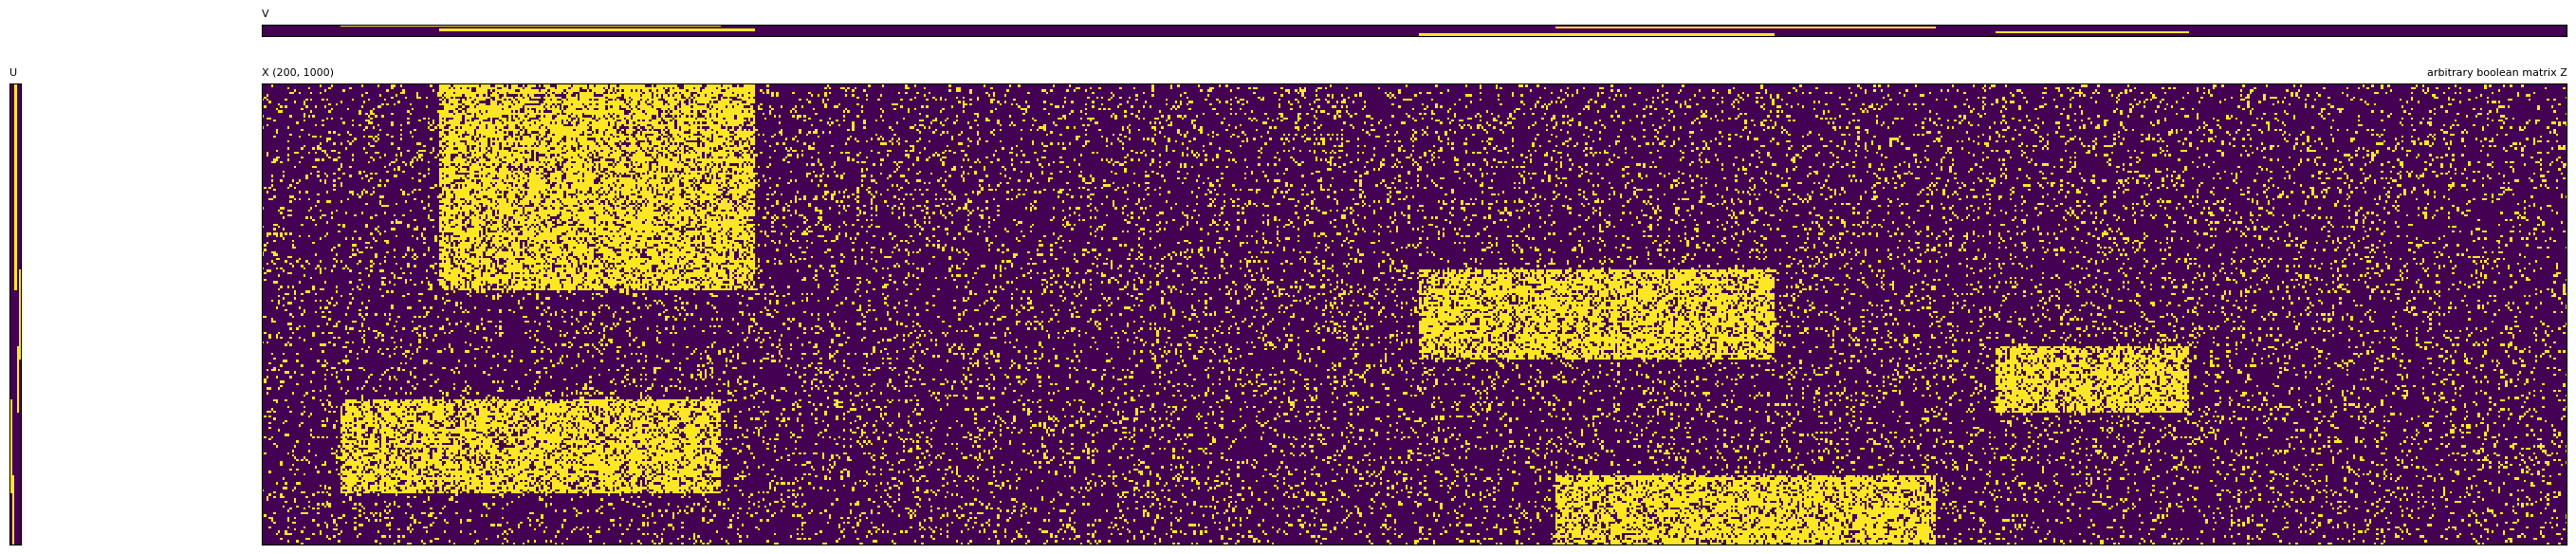

In [4]:
# generate arbitrary Boolean matrix (X)

n_row=2000
n_col=1000
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=2023) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(title='arbitrary boolean matrix X')

# generate arbitrary Boolean matrix (Z)

n_row=200
n_col=1000
k=5
overlap=[0.2, 0.1, 0.2, 0.1]
noise=[0.3, 0.1]

Z = DiagBooleanMatrix(m=n_row, n=n_col, k=k, overlap=overlap)
Z.generate(seed=1997)
Z.shuffle_factors(seed=2023)
Z.V = X.V # replace one factor
Z.boolean_matmul()
Z.add_noise(noise=noise, seed=1024)
Z.show_matrix(title="arbitrary boolean matrix Z")

In [5]:
from datasets import Dataset, GeneratedData
X_data = GeneratedData(bm=X, X_name='X', U_name='U', V_name='V')
Z_data = GeneratedData(bm=Z, X_name='Z', U_name='W', V_name='V')

# ds_train = Dataset()
# ds_train.load_data(X=X_data)
# ds_train.load_data(X=Z_data)
# ds_train.summarize()

In [6]:
# from datasets import Dataset, NetflixData, NetflixGenreData
# X_data = NetflixData(small=True)
# Z_data = NetflixGenreData(small=True)

# sum_u, sum_v = X_data.X.sum
# # idx_u = sum_u > 130
# # idx_v = sum_v > 200
# idx_u = sum_u > 40
# idx_v = sum_v > 60
# print(X_data.X.shape, sum(idx_u), sum(idx_v))

In [7]:
# # down-sampling by constraints

# X_data.sample(idx=idx_u, axis=0)
# print(X_data.X.shape)
# X_data.sample(idx=idx_v, axis=1)
# print(X_data.X.shape)
# Z_data.sample(idx=idx_v, axis=1)
# print(Z_data.X.shape)

In [8]:
# # down-sampling by random

# X_data.sample(n=1000, axis=0)
# print(X_data.X.shape)
# idx_v = X_data.sample(n=500, axis=1)
# print(X_data.X.shape)
# Z_data.sample(idx=idx_v, axis=1)
# print(Z_data.X.shape)

# k-fold cross-validation

[I] cross-validation, sampling positives
[I]   Data seed    : 1997
[I]   partition    : [0, 19617, 39234, 58850, 78466, 98082]
[I]   test_size    : 0.2
[I]   seed         : 1997
[I] getting cross-validation indices
[I]   current fold         : 1
[I]   current train size   : 78465
[I]   current val size     : 19617
[I] cross-validation, sampling negatives
[I]   Data seed    : 6666


100%|██████████| 6130/6130 [00:00<00:00, 6712.33it/s] 
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


[I]   n_negatives  : 6130
[I]   test_size    : 1226
[I]   seed         : 6666
[I] getting cross-validation indices
[I]   current fold         : 1
[I]   current train size   : 0
[I]   current val size     : 4904
[I] Mean num of Vs per U in X: 39.2
[I] Mean num of Us per V in X: 78.5
[I] Median num of Vs per U in X: 16.0
[I] Median num of Us per V in X: 35.0
[I] Mean num of Vs per U in X: 9.8
[I] Mean num of Us per V in X: 19.6
[I] Median num of Vs per U in X: 5.0
[I] Median num of Us per V in X: 11.0
[I] Mean num of Vs per U in X: 12.3
[I] Mean num of Us per V in X: 24.5
[I] Median num of Vs per U in X: 6.0
[I] Median num of Us per V in X: 13.0
[I] k            : 5
[I] algorithm    : penalty
[I] reg          : 10
[I] reg_growth   : 1.01
[I] eps          : 0.01
[I] max_iter     : 100
[I] display : True
[I] seed         : 1000
[W] Missing validation set.
[I] k            : 5
[I] seed         : 1698166930
[I] init         : random
[I] max_iter     : 2000
[I] After initialization: max U: 1.

c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_compressed.py:291: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


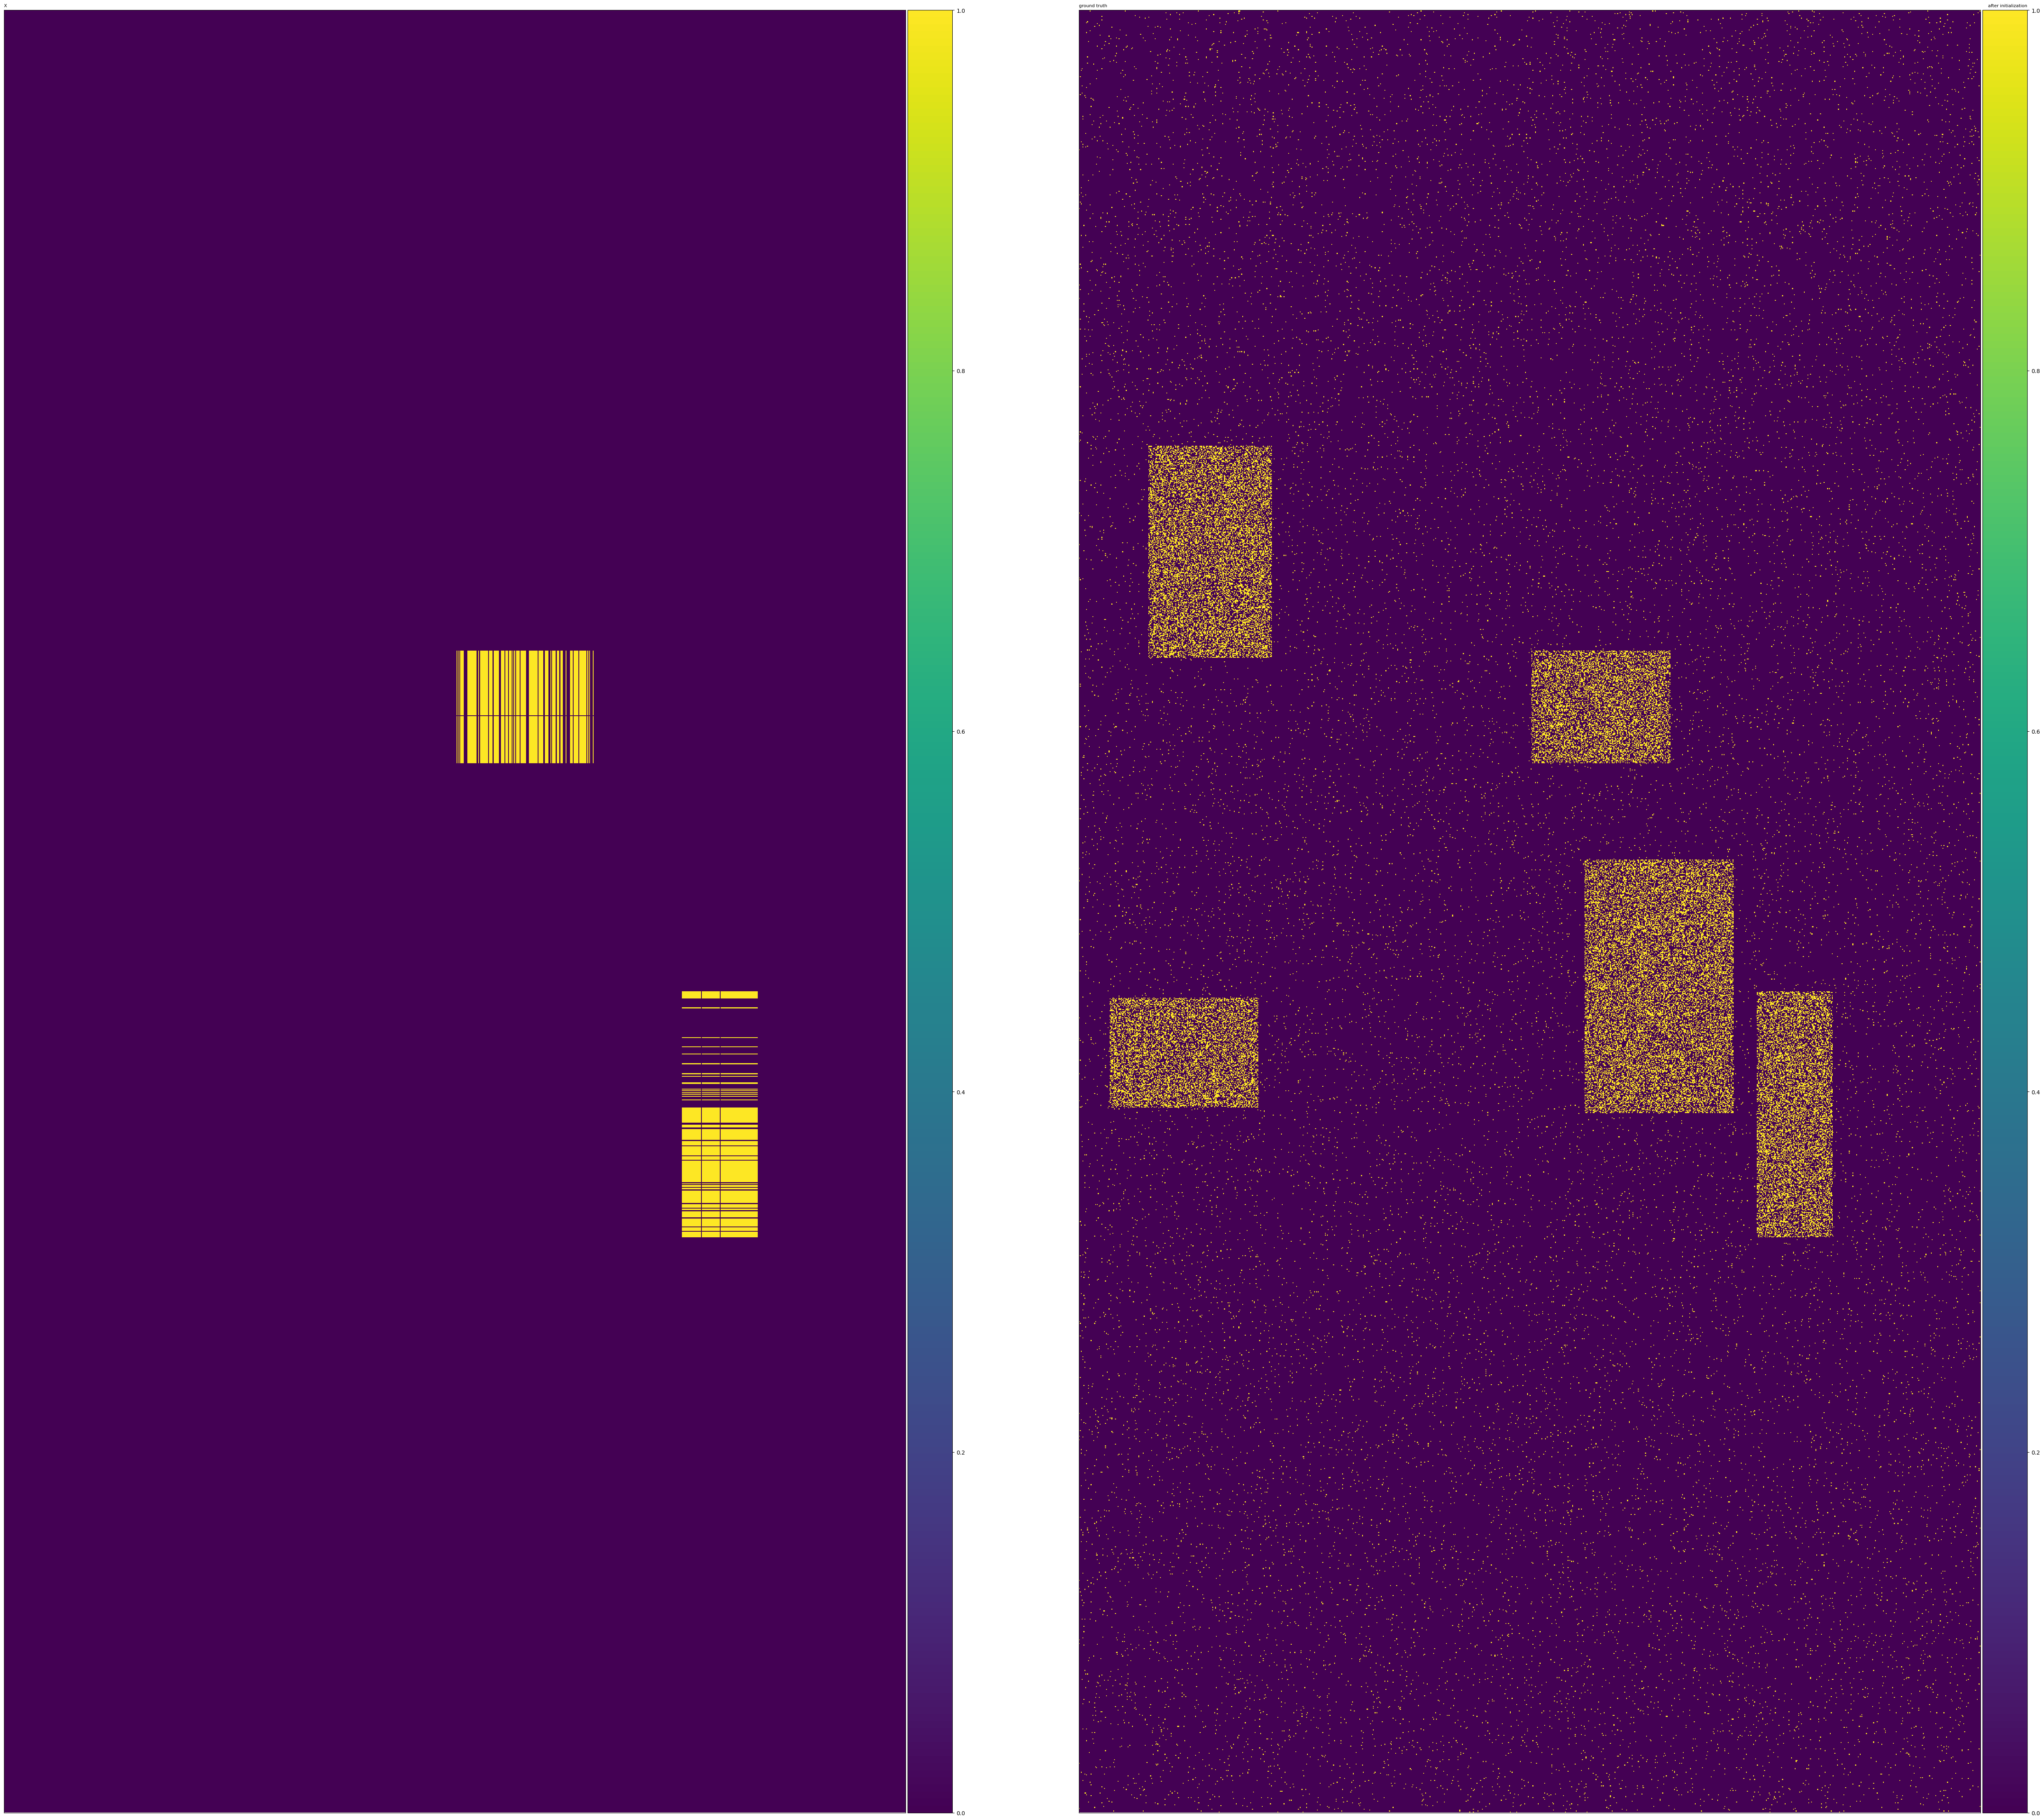

[I] After normalization: max U: 0.856, max V: 0.856


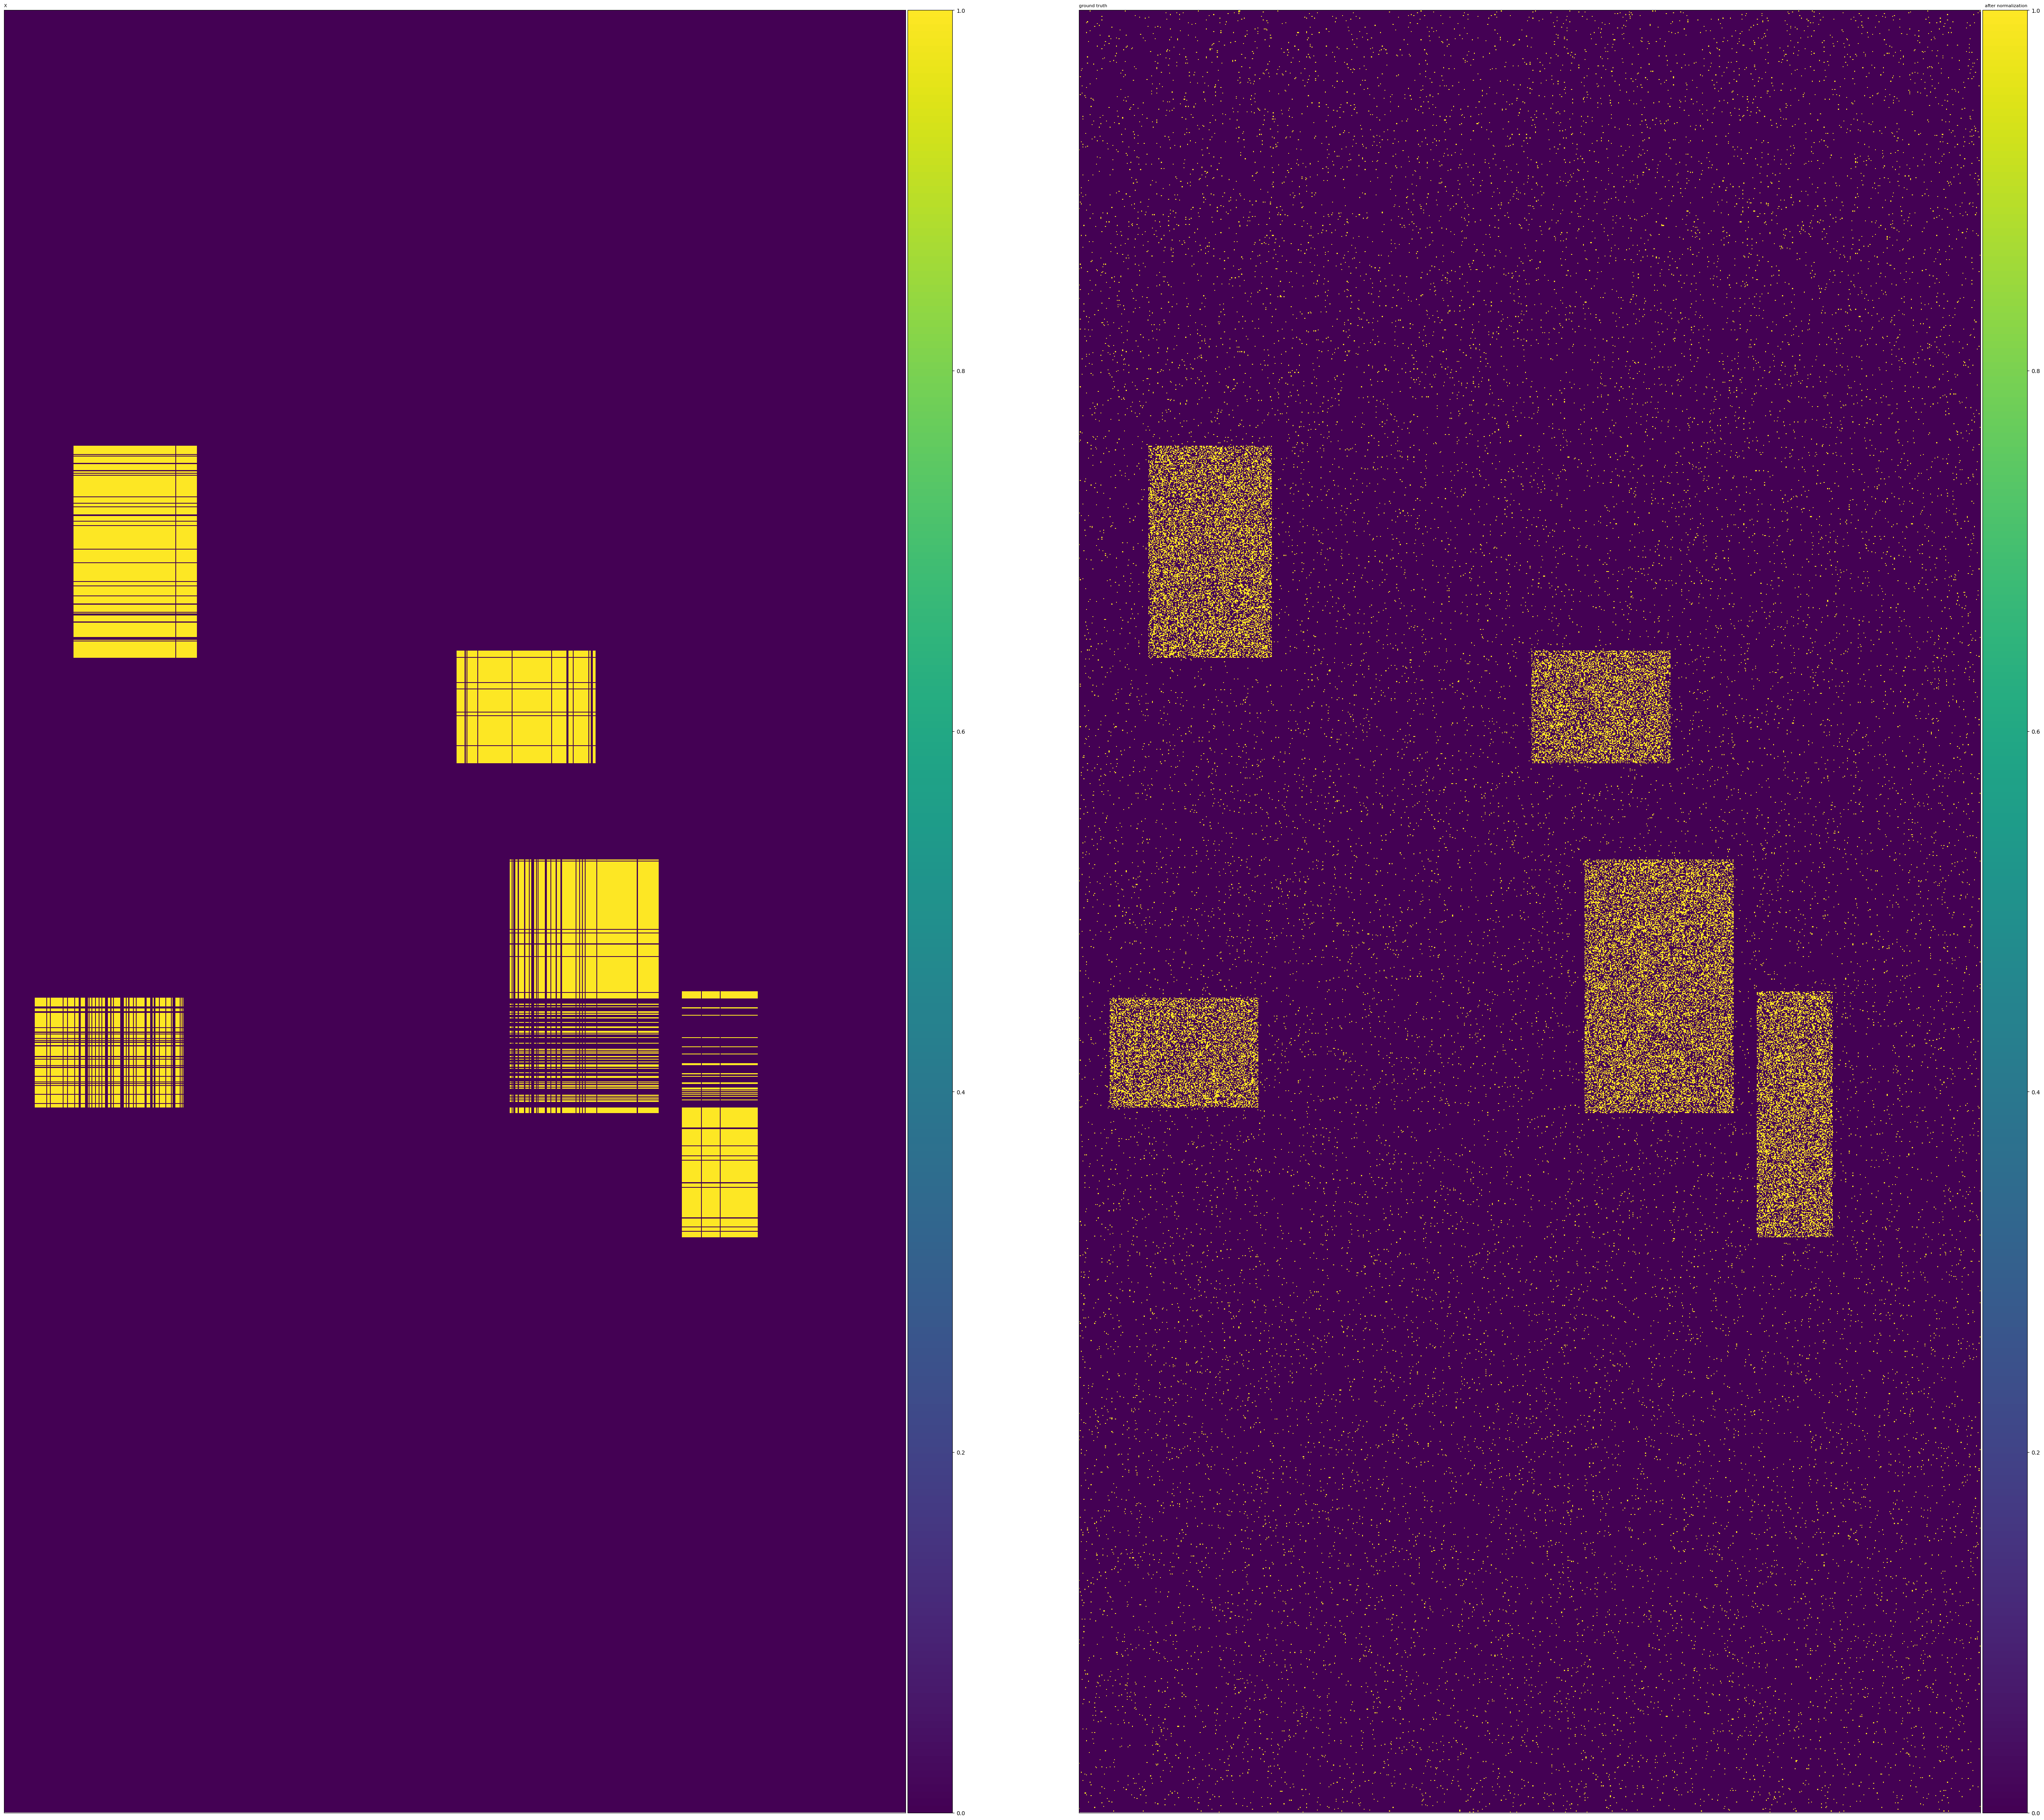

[I] iter: 0, reg: 10.000, err: 107.811, rec_err: 56352.279, reg_err: 107.811
[I] iter: 1, reg: 10.100, err: 105.555, rec_err: 56360.166, reg_err: 105.555
[I] iter: 2, reg: 10.201, err: 104.913, rec_err: 56363.616, reg_err: 104.913
[I] iter: 3, reg: 10.303, err: 104.555, rec_err: 56365.254, reg_err: 104.555
[I] iter: 4, reg: 10.406, err: 104.285, rec_err: 56366.294, reg_err: 104.285
[I] iter: 5, reg: 10.510, err: 104.049, rec_err: 56367.088, reg_err: 104.049
[I] iter: 6, reg: 10.615, err: 103.829, rec_err: 56367.773, reg_err: 103.829
[I] iter: 7, reg: 10.721, err: 103.614, rec_err: 56368.406, reg_err: 103.614
[I] iter: 8, reg: 10.829, err: 103.398, rec_err: 56369.015, reg_err: 103.398
[I] iter: 9, reg: 10.937, err: 103.178, rec_err: 56369.613, reg_err: 103.178


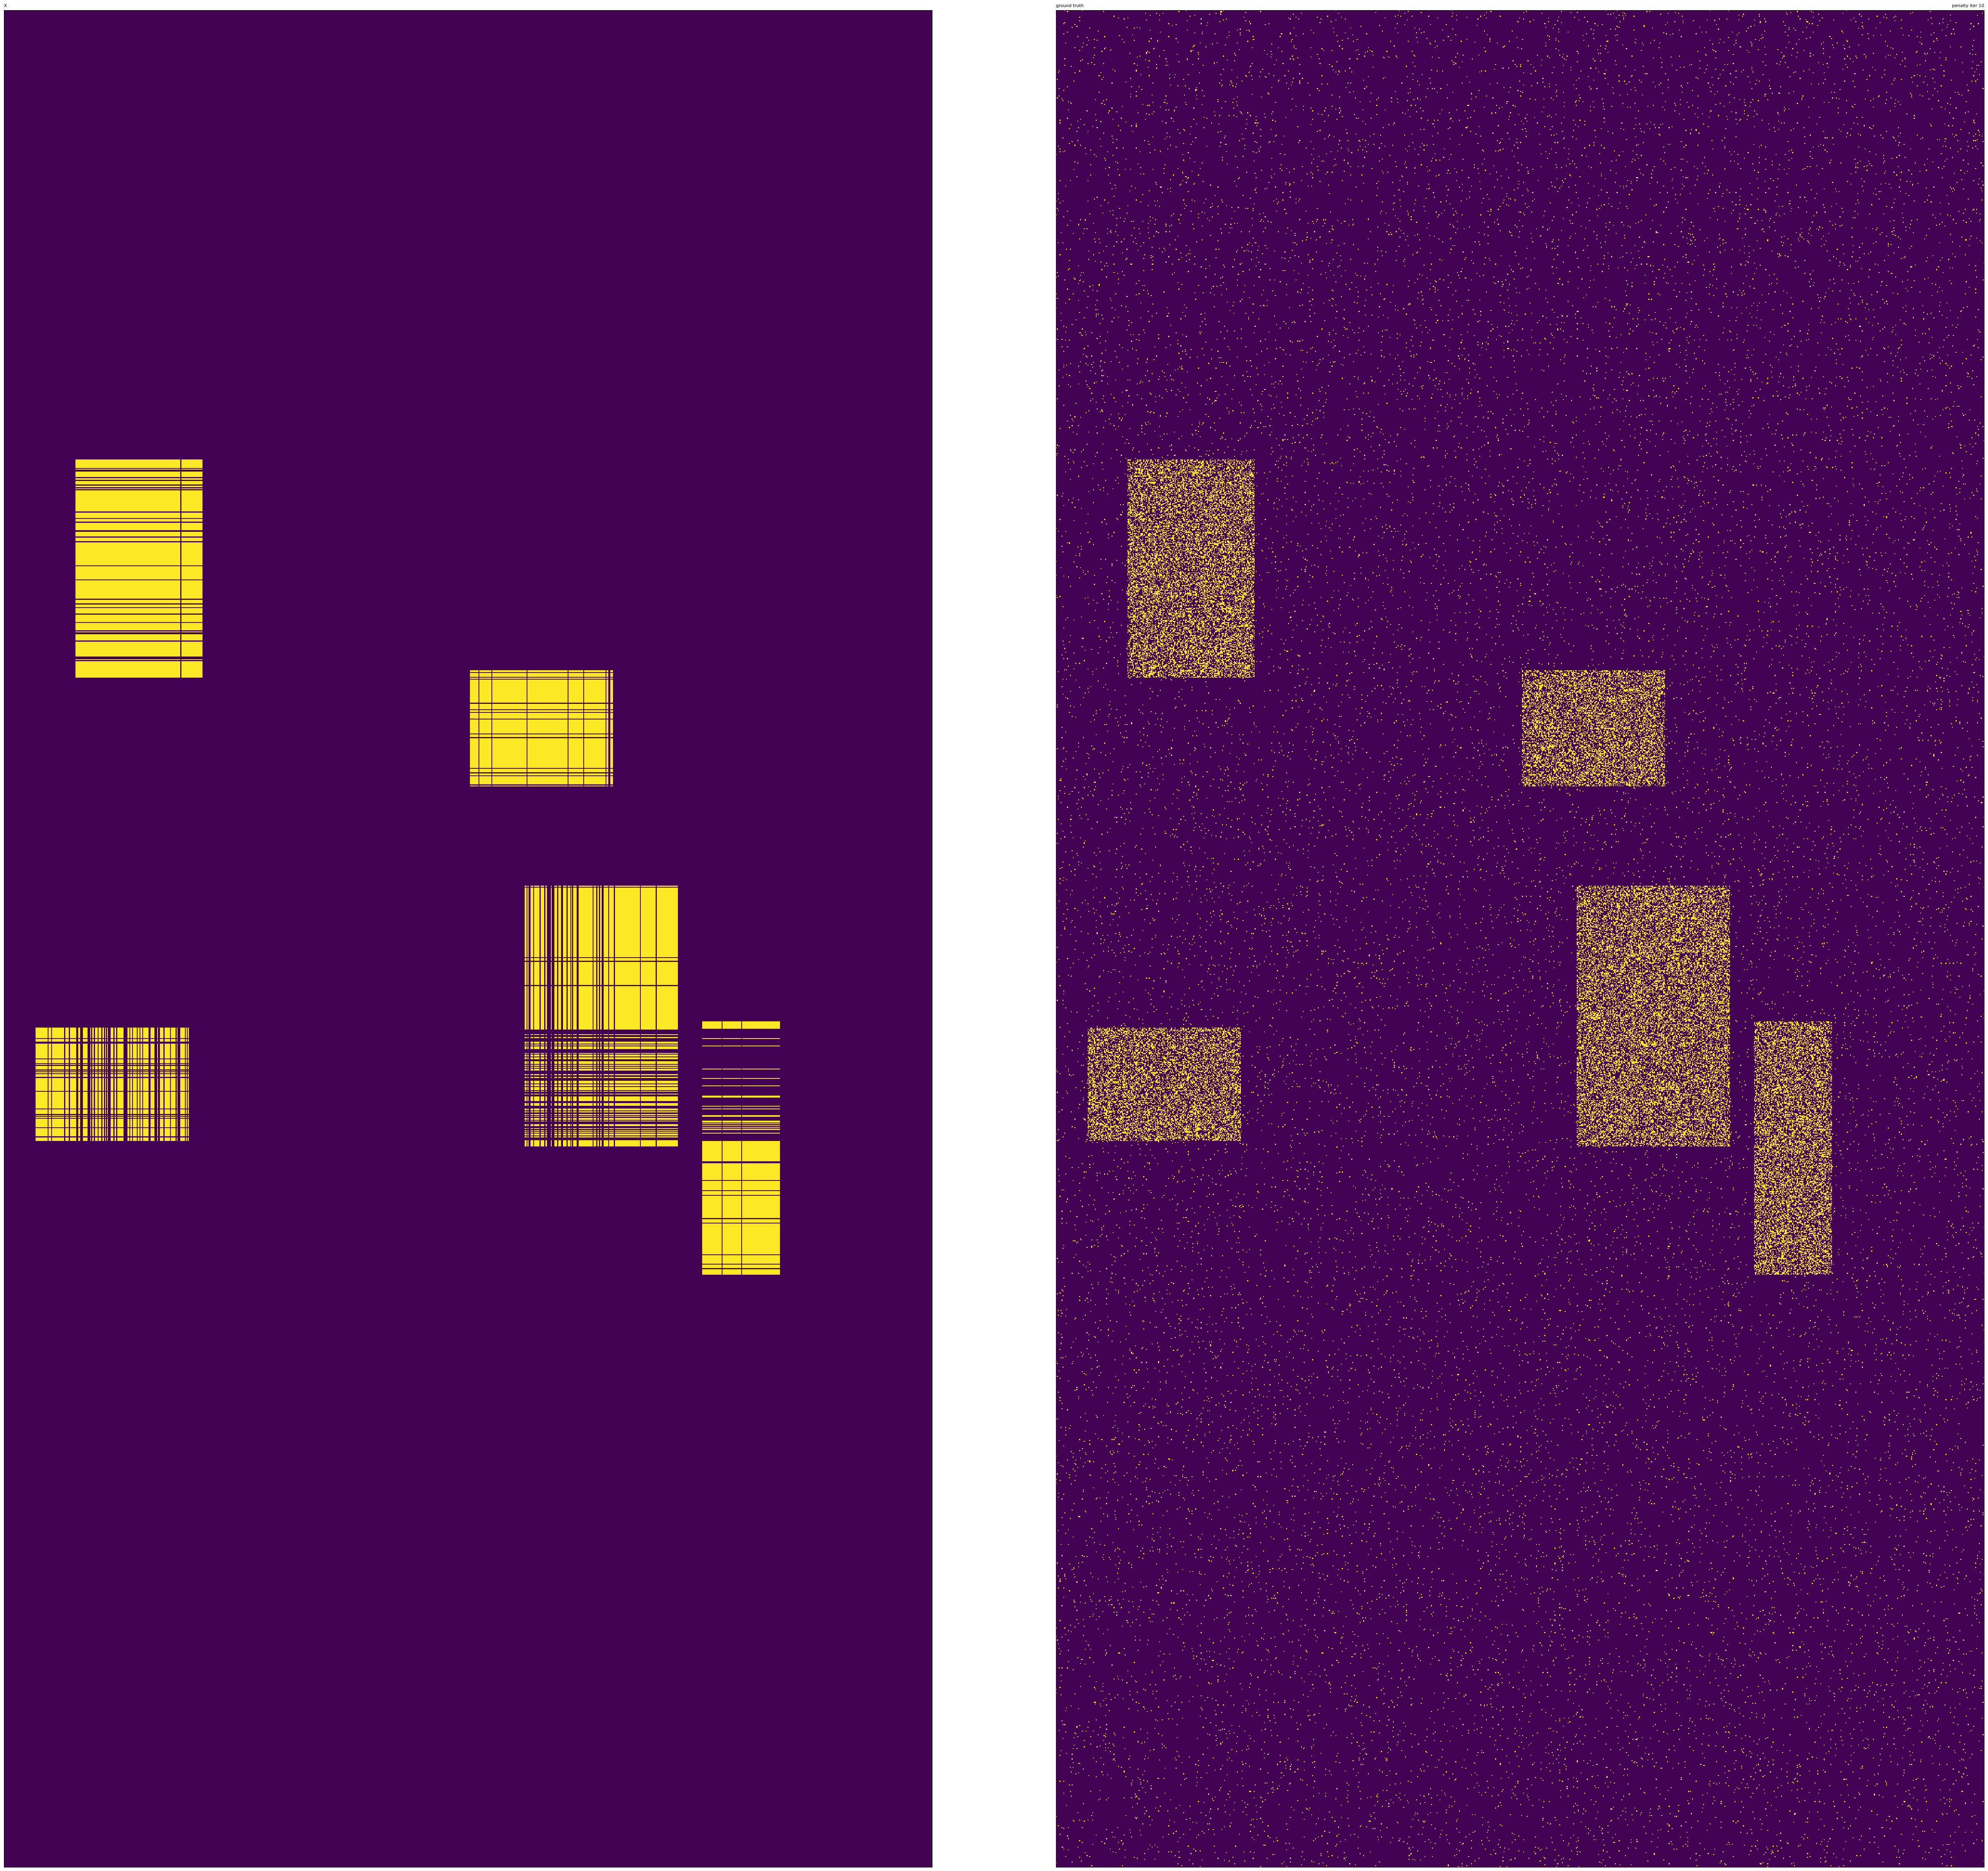

[I] iter: 10, reg: 11.046, err: 102.950, rec_err: 56370.204, reg_err: 102.950
[I] iter: 11, reg: 11.157, err: 102.710, rec_err: 56370.794, reg_err: 102.710
[I] iter: 12, reg: 11.268, err: 102.455, rec_err: 56371.383, reg_err: 102.455
[I] iter: 13, reg: 11.381, err: 102.182, rec_err: 56371.972, reg_err: 102.182
[I] iter: 14, reg: 11.495, err: 101.886, rec_err: 56372.563, reg_err: 101.886
[I] iter: 15, reg: 11.610, err: 101.563, rec_err: 56373.155, reg_err: 101.563
[I] iter: 16, reg: 11.726, err: 101.207, rec_err: 56373.749, reg_err: 101.207
[I] iter: 17, reg: 11.843, err: 100.812, rec_err: 56374.346, reg_err: 100.812
[I] iter: 18, reg: 11.961, err: 100.372, rec_err: 56374.944, reg_err: 100.372
[I] iter: 19, reg: 12.081, err: 99.879, rec_err: 56375.546, reg_err: 99.879


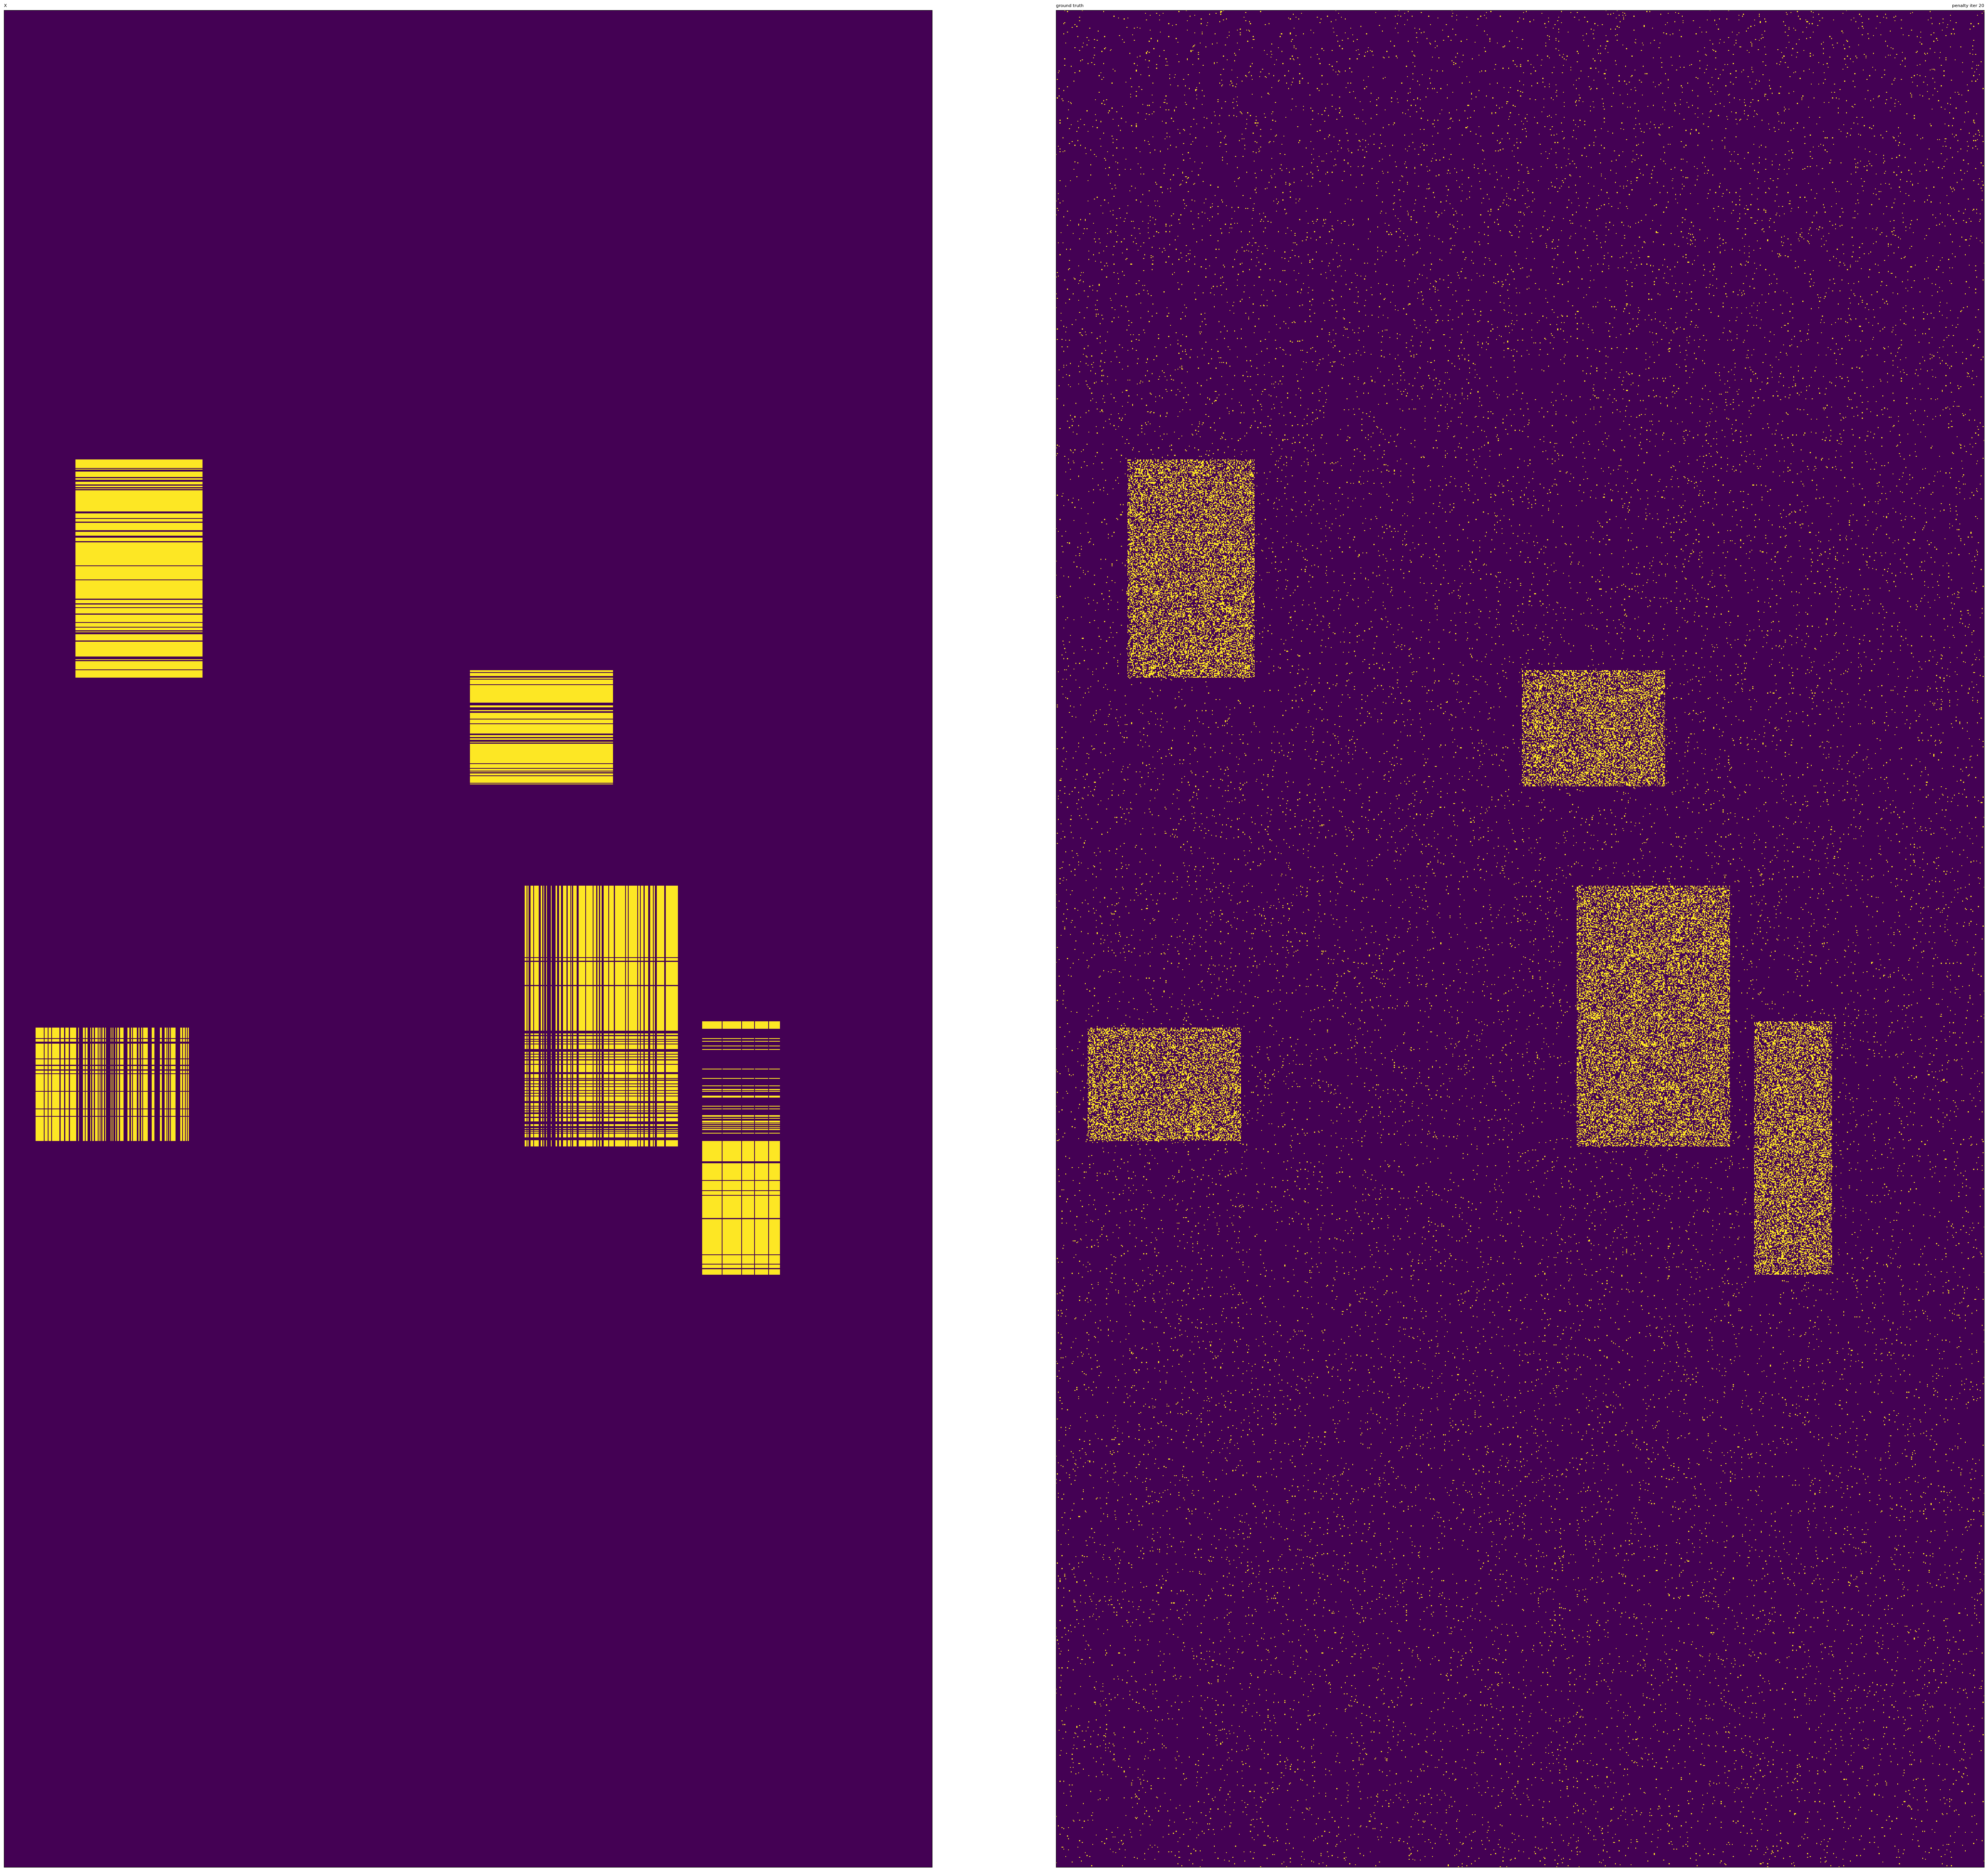

[I] iter: 20, reg: 12.202, err: 99.325, rec_err: 56376.150, reg_err: 99.325
[I] iter: 21, reg: 12.324, err: 98.702, rec_err: 56376.758, reg_err: 98.702
[I] iter: 22, reg: 12.447, err: 98.000, rec_err: 56377.370, reg_err: 98.000
[I] iter: 23, reg: 12.572, err: 97.212, rec_err: 56377.990, reg_err: 97.212
[I] iter: 24, reg: 12.697, err: 96.328, rec_err: 56378.618, reg_err: 96.328
[I] iter: 25, reg: 12.824, err: 95.341, rec_err: 56379.259, reg_err: 95.341
[I] iter: 26, reg: 12.953, err: 94.246, rec_err: 56379.919, reg_err: 94.246
[I] iter: 27, reg: 13.082, err: 93.042, rec_err: 56380.606, reg_err: 93.042
[I] iter: 28, reg: 13.213, err: 91.729, rec_err: 56381.330, reg_err: 91.729
[I] iter: 29, reg: 13.345, err: 90.315, rec_err: 56382.105, reg_err: 90.315


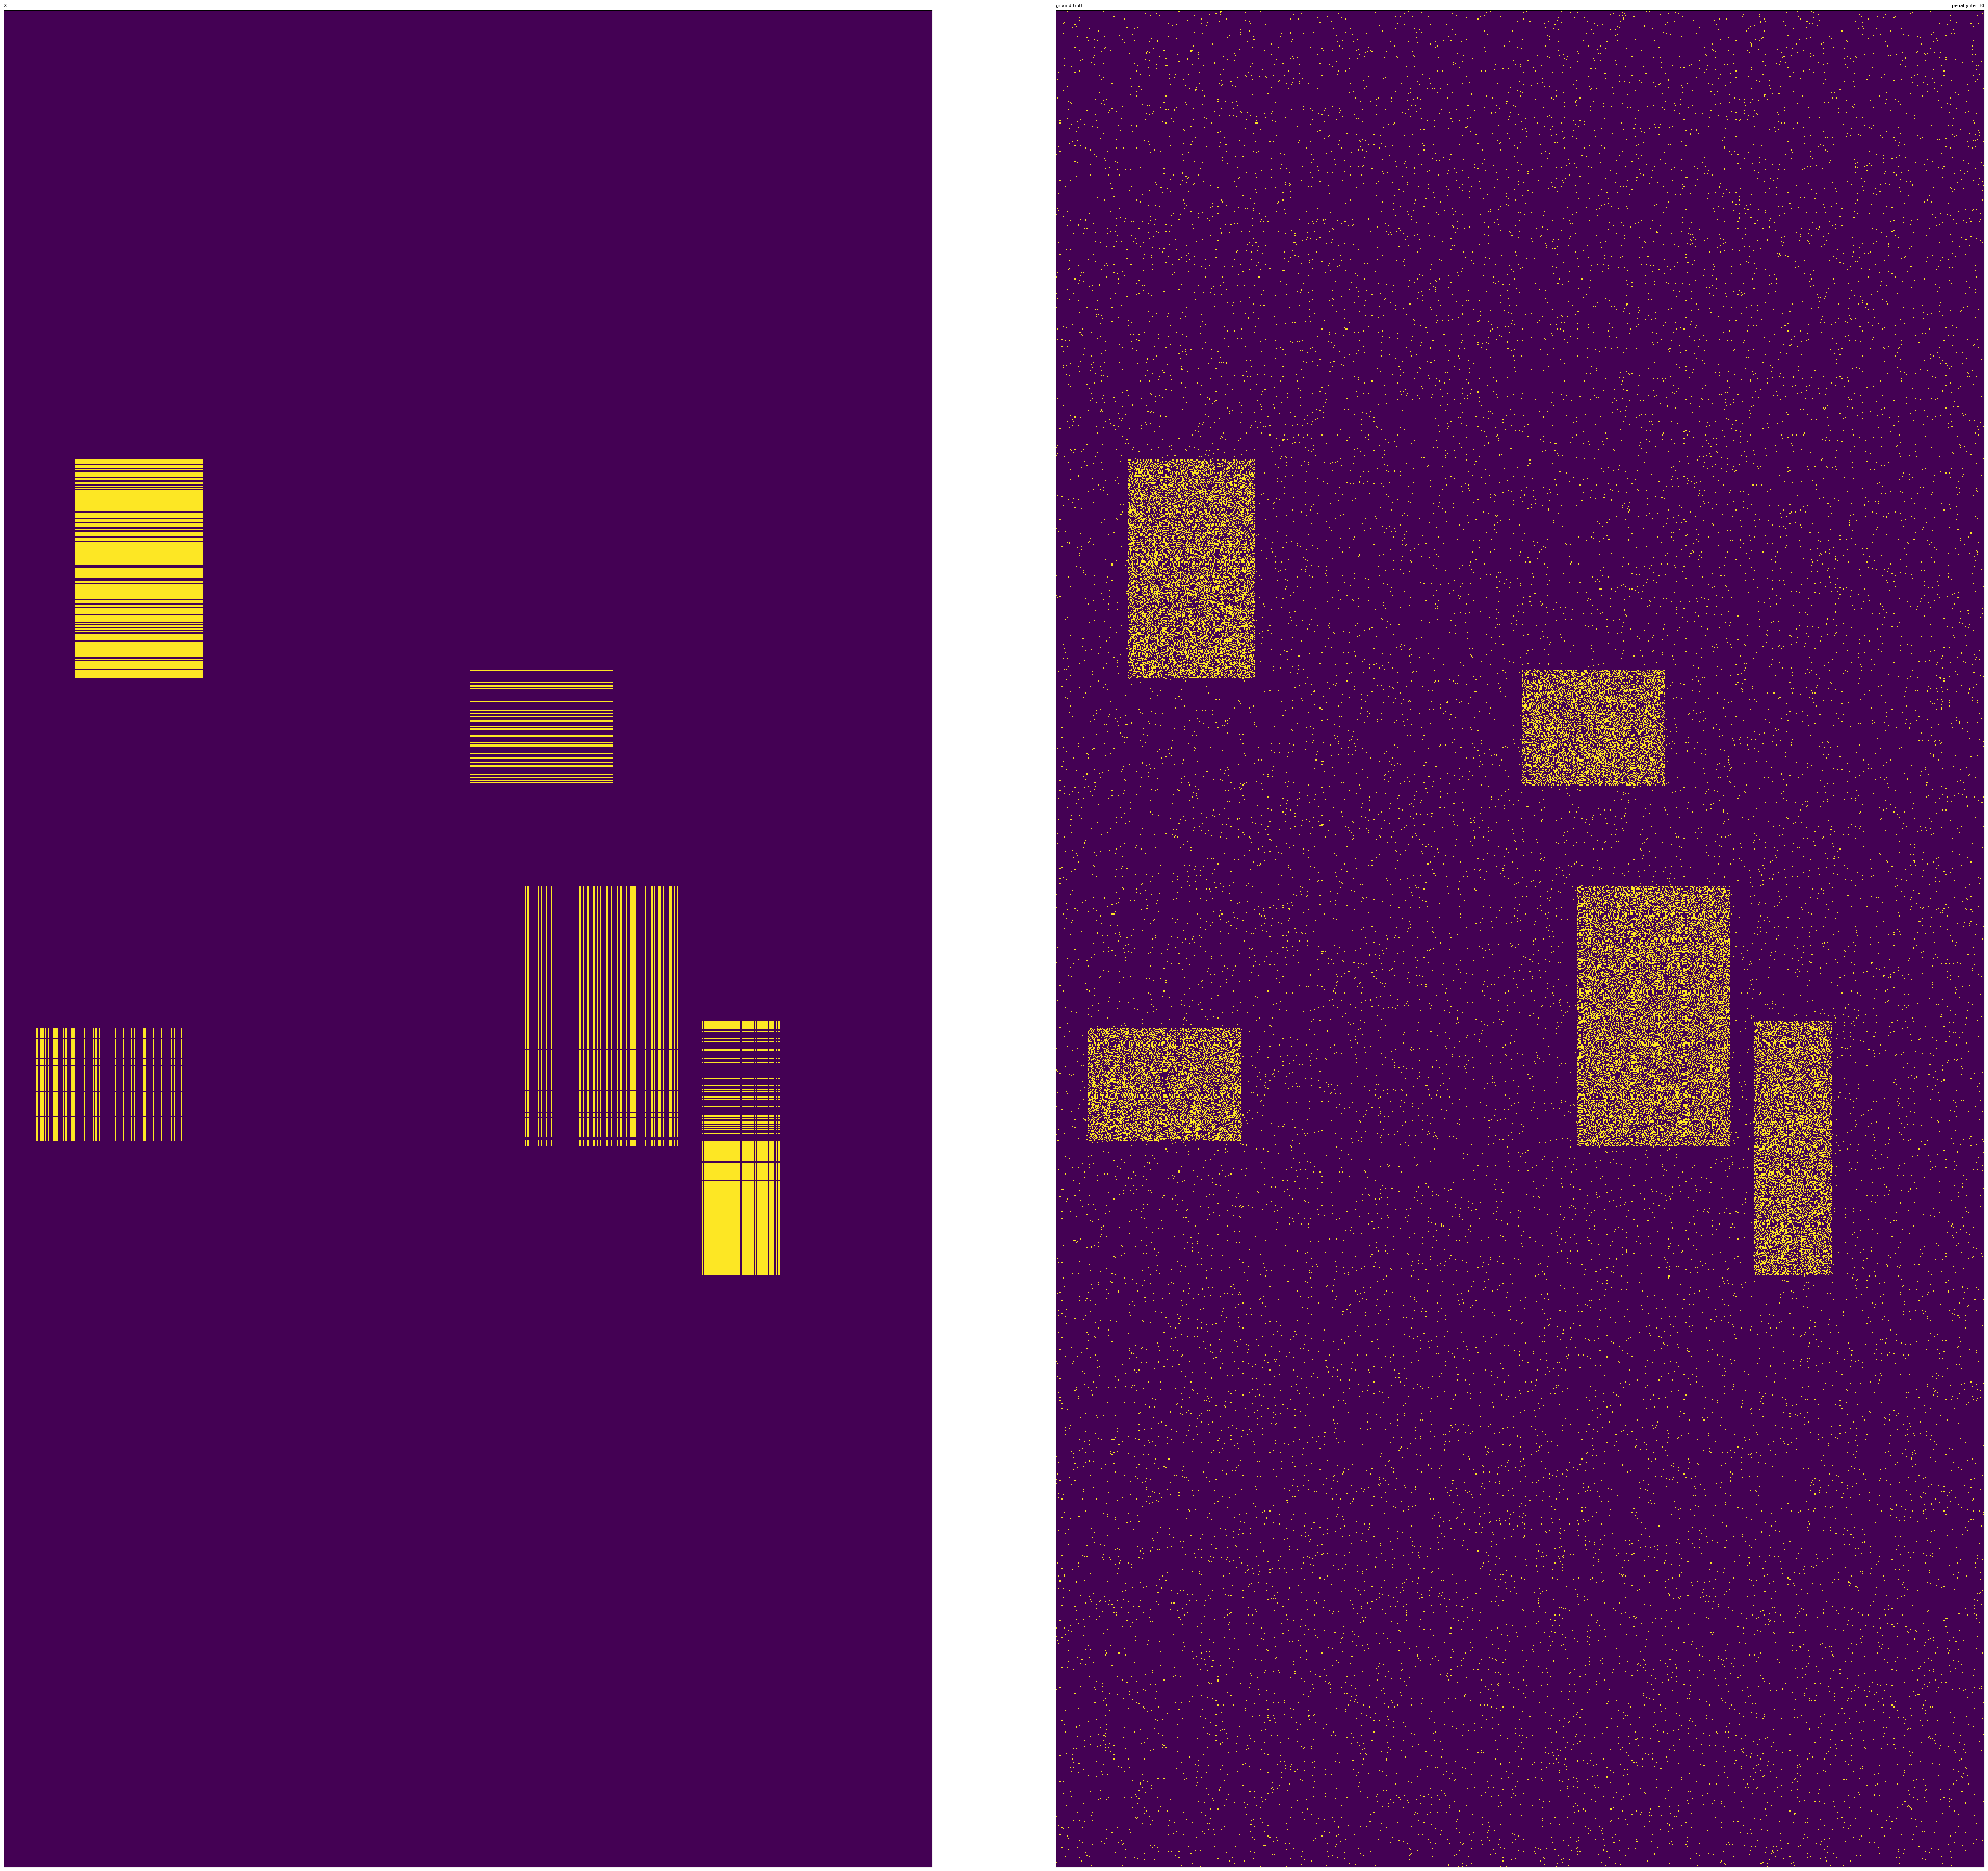

[I] iter: 30, reg: 13.478, err: 88.810, rec_err: 56382.949, reg_err: 88.810
[I] iter: 31, reg: 13.613, err: 87.231, rec_err: 56383.883, reg_err: 87.231
[I] iter: 32, reg: 13.749, err: 85.598, rec_err: 56384.928, reg_err: 85.598
[I] iter: 33, reg: 13.887, err: 83.934, rec_err: 56386.110, reg_err: 83.934
[I] iter: 34, reg: 14.026, err: 82.261, rec_err: 56387.452, reg_err: 82.261
[I] iter: 35, reg: 14.166, err: 80.601, rec_err: 56388.974, reg_err: 80.601
[I] iter: 36, reg: 14.308, err: 78.973, rec_err: 56390.691, reg_err: 78.973
[I] iter: 37, reg: 14.451, err: 77.392, rec_err: 56392.611, reg_err: 77.392
[I] iter: 38, reg: 14.595, err: 75.865, rec_err: 56394.732, reg_err: 75.865
[I] iter: 39, reg: 14.741, err: 74.398, rec_err: 56397.042, reg_err: 74.398


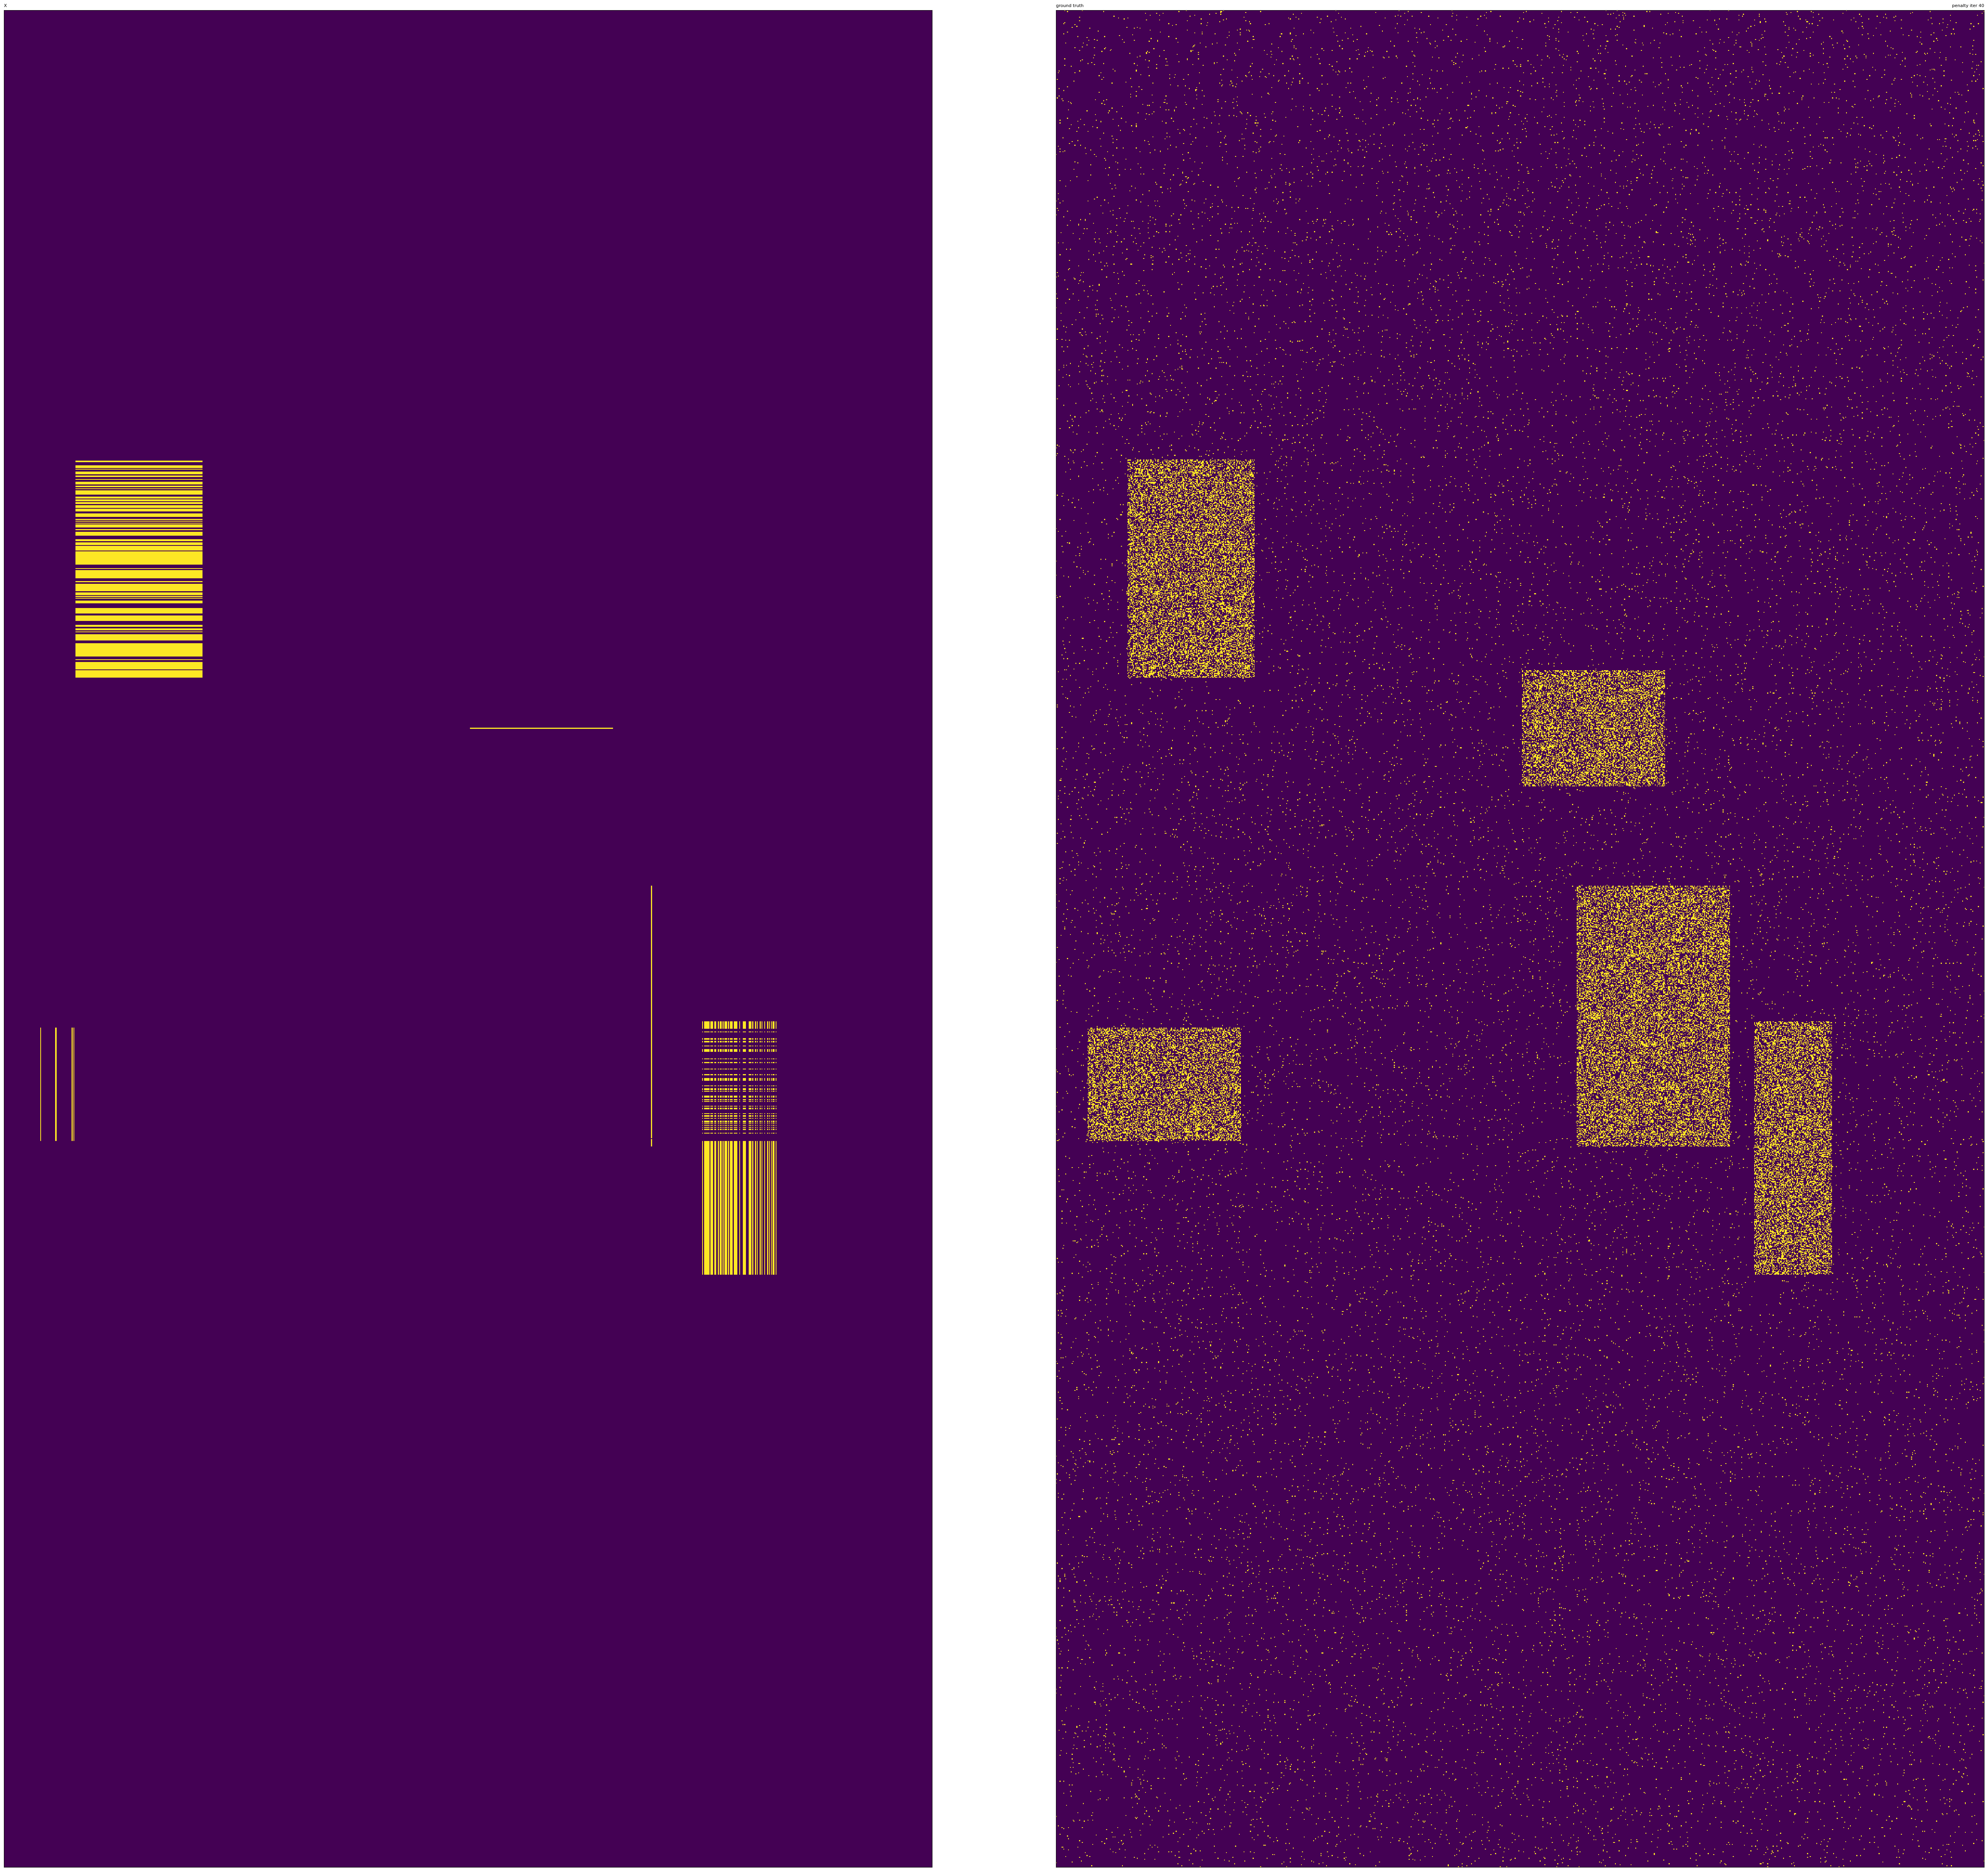

[I] iter: 40, reg: 14.889, err: 72.993, rec_err: 56399.524, reg_err: 72.993
[I] iter: 41, reg: 15.038, err: 71.646, rec_err: 56402.153, reg_err: 71.646
[I] iter: 42, reg: 15.188, err: 70.355, rec_err: 56404.904, reg_err: 70.355
[I] iter: 43, reg: 15.340, err: 69.116, rec_err: 56407.749, reg_err: 69.116
[I] iter: 44, reg: 15.493, err: 67.923, rec_err: 56410.667, reg_err: 67.923
[I] iter: 45, reg: 15.648, err: 66.774, rec_err: 56413.638, reg_err: 66.774
[I] iter: 46, reg: 15.805, err: 65.665, rec_err: 56416.649, reg_err: 65.665
[I] iter: 47, reg: 15.963, err: 64.594, rec_err: 56419.690, reg_err: 64.594
[I] iter: 48, reg: 16.122, err: 63.559, rec_err: 56422.754, reg_err: 63.559
[I] iter: 49, reg: 16.283, err: 62.561, rec_err: 56425.837, reg_err: 62.561


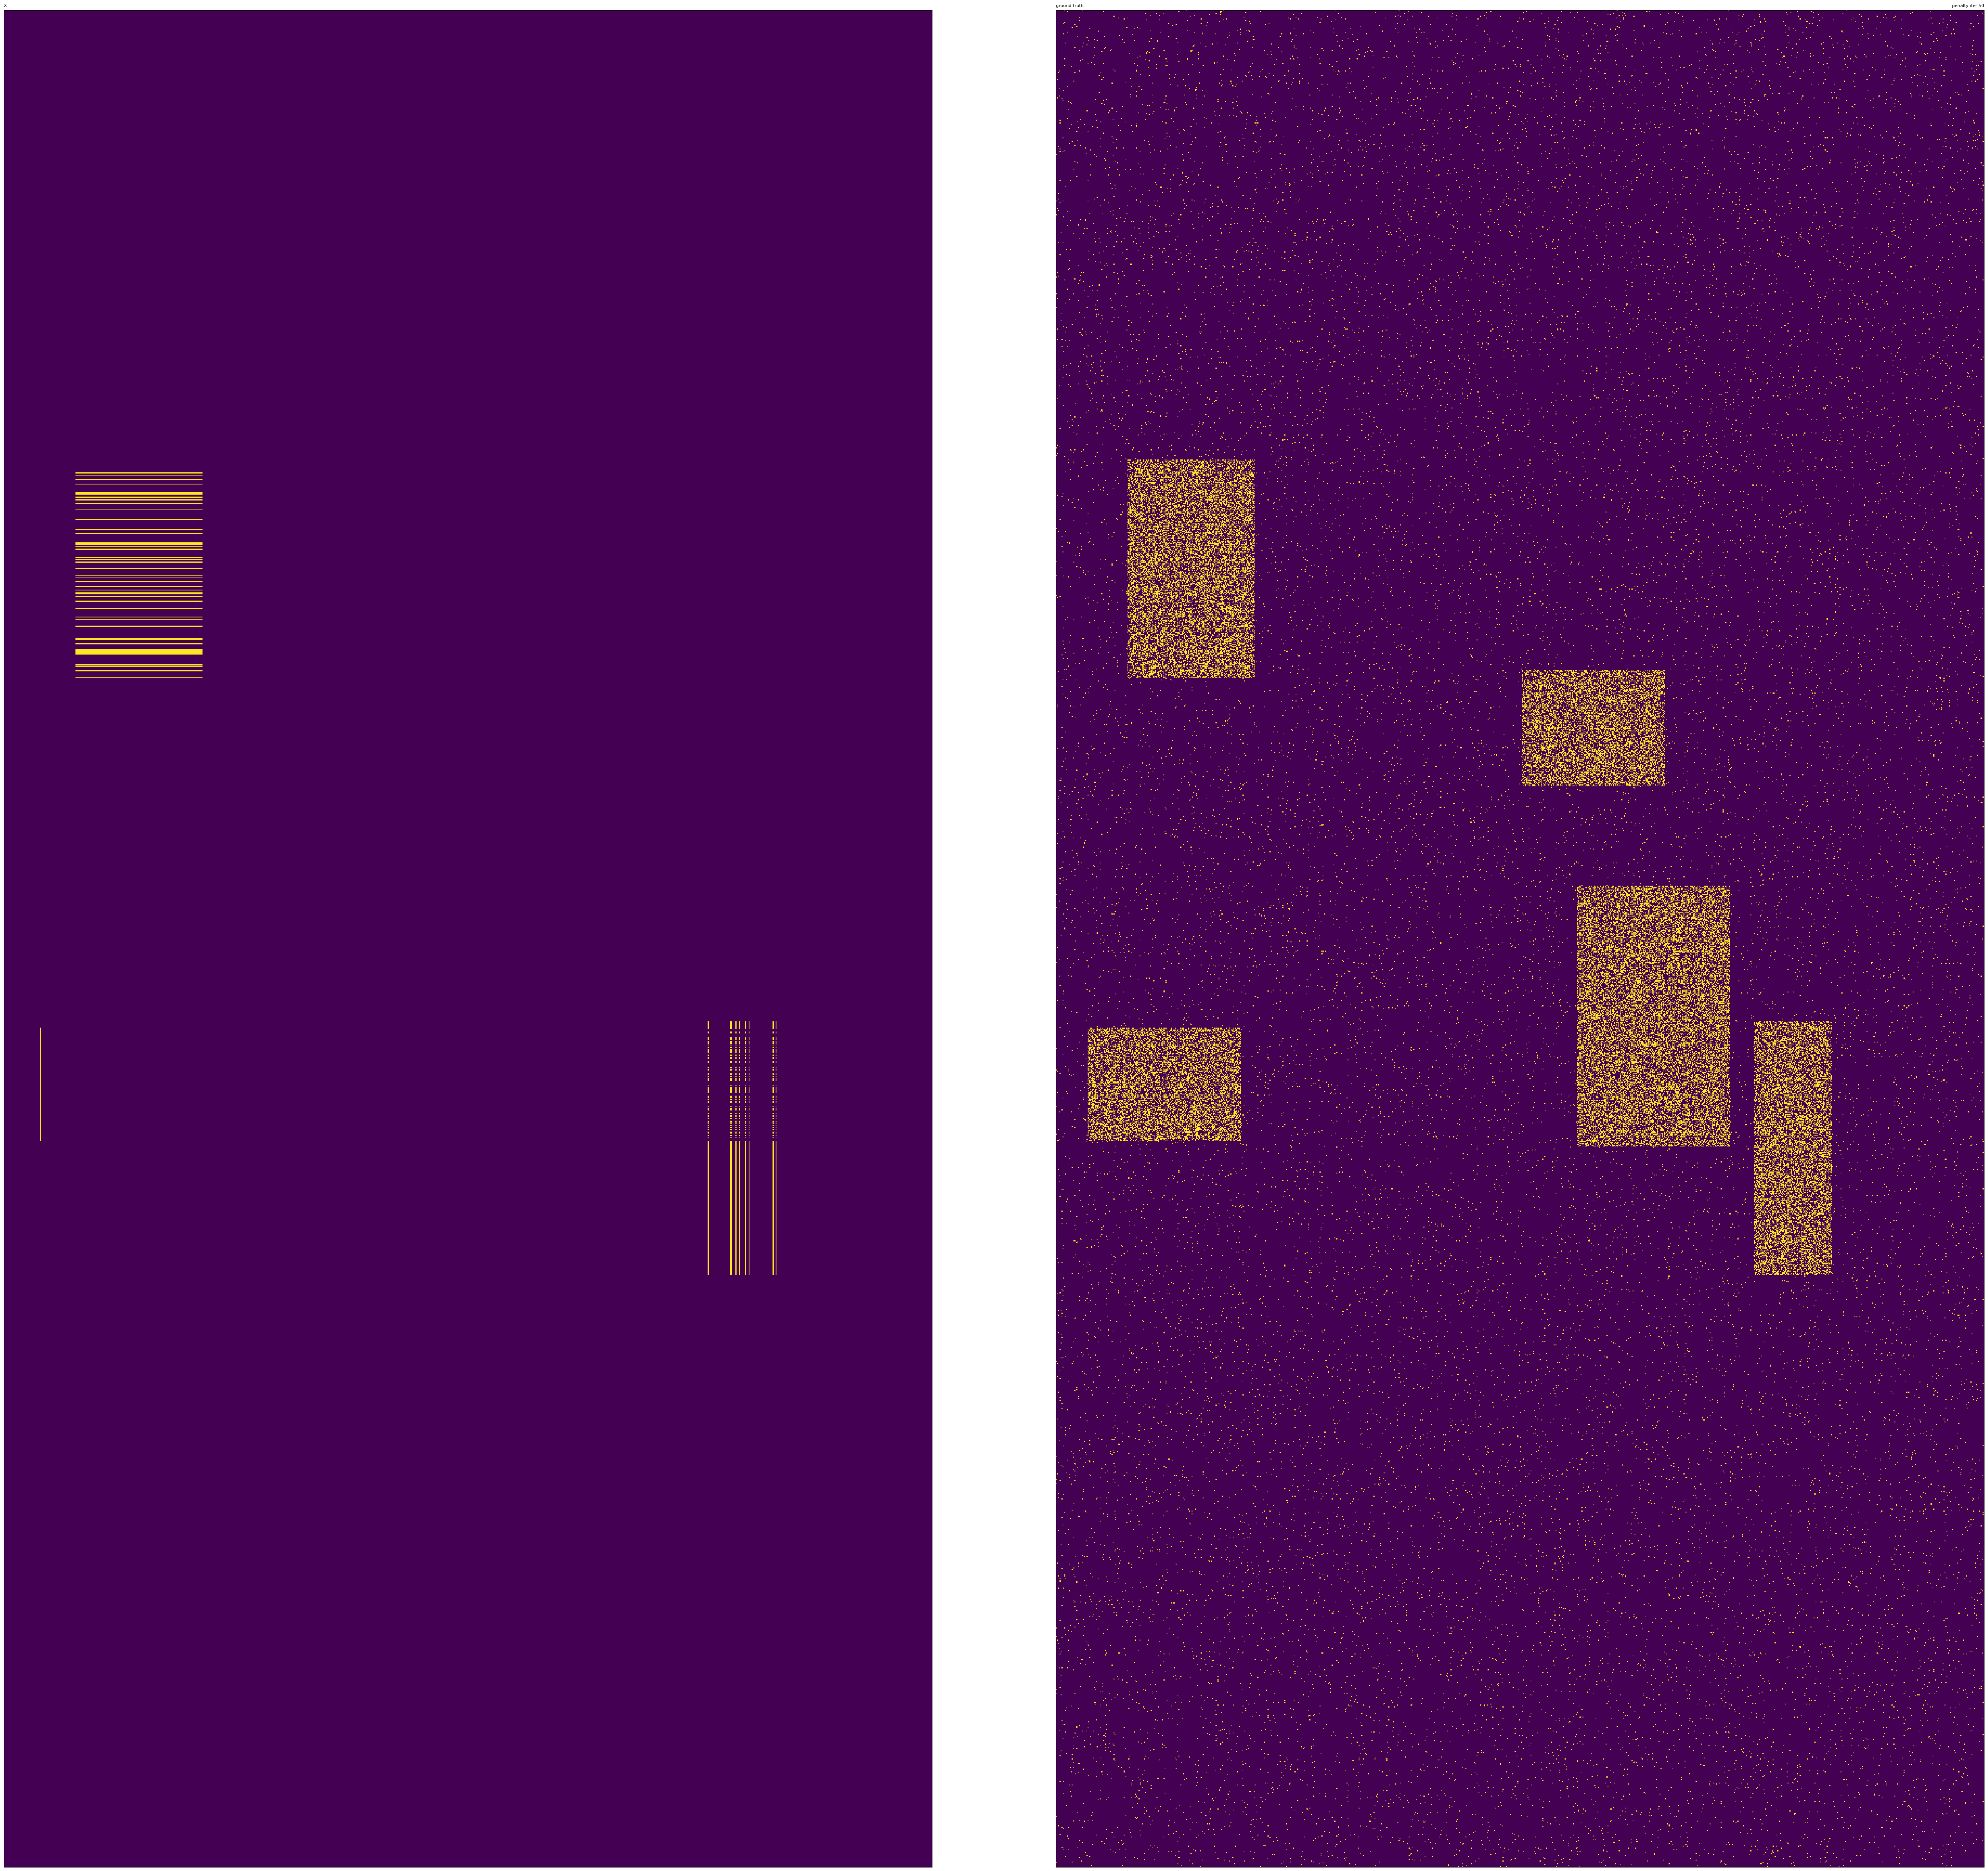

[I] iter: 50, reg: 16.446, err: 61.602, rec_err: 56428.936, reg_err: 61.602
[I] iter: 51, reg: 16.611, err: 60.685, rec_err: 56432.046, reg_err: 60.685
[I] iter: 52, reg: 16.777, err: 59.815, rec_err: 56435.162, reg_err: 59.815
[I] iter: 53, reg: 16.945, err: 58.996, rec_err: 56438.278, reg_err: 58.996
[I] iter: 54, reg: 17.114, err: 58.232, rec_err: 56441.385, reg_err: 58.232
[I] iter: 55, reg: 17.285, err: 57.527, rec_err: 56444.473, reg_err: 57.527
[I] iter: 56, reg: 17.458, err: 56.880, rec_err: 56447.531, reg_err: 56.880
[I] iter: 57, reg: 17.633, err: 56.291, rec_err: 56450.548, reg_err: 56.291
[I] iter: 58, reg: 17.809, err: 55.755, rec_err: 56453.511, reg_err: 55.755
[I] iter: 59, reg: 17.987, err: 55.266, rec_err: 56456.411, reg_err: 55.266


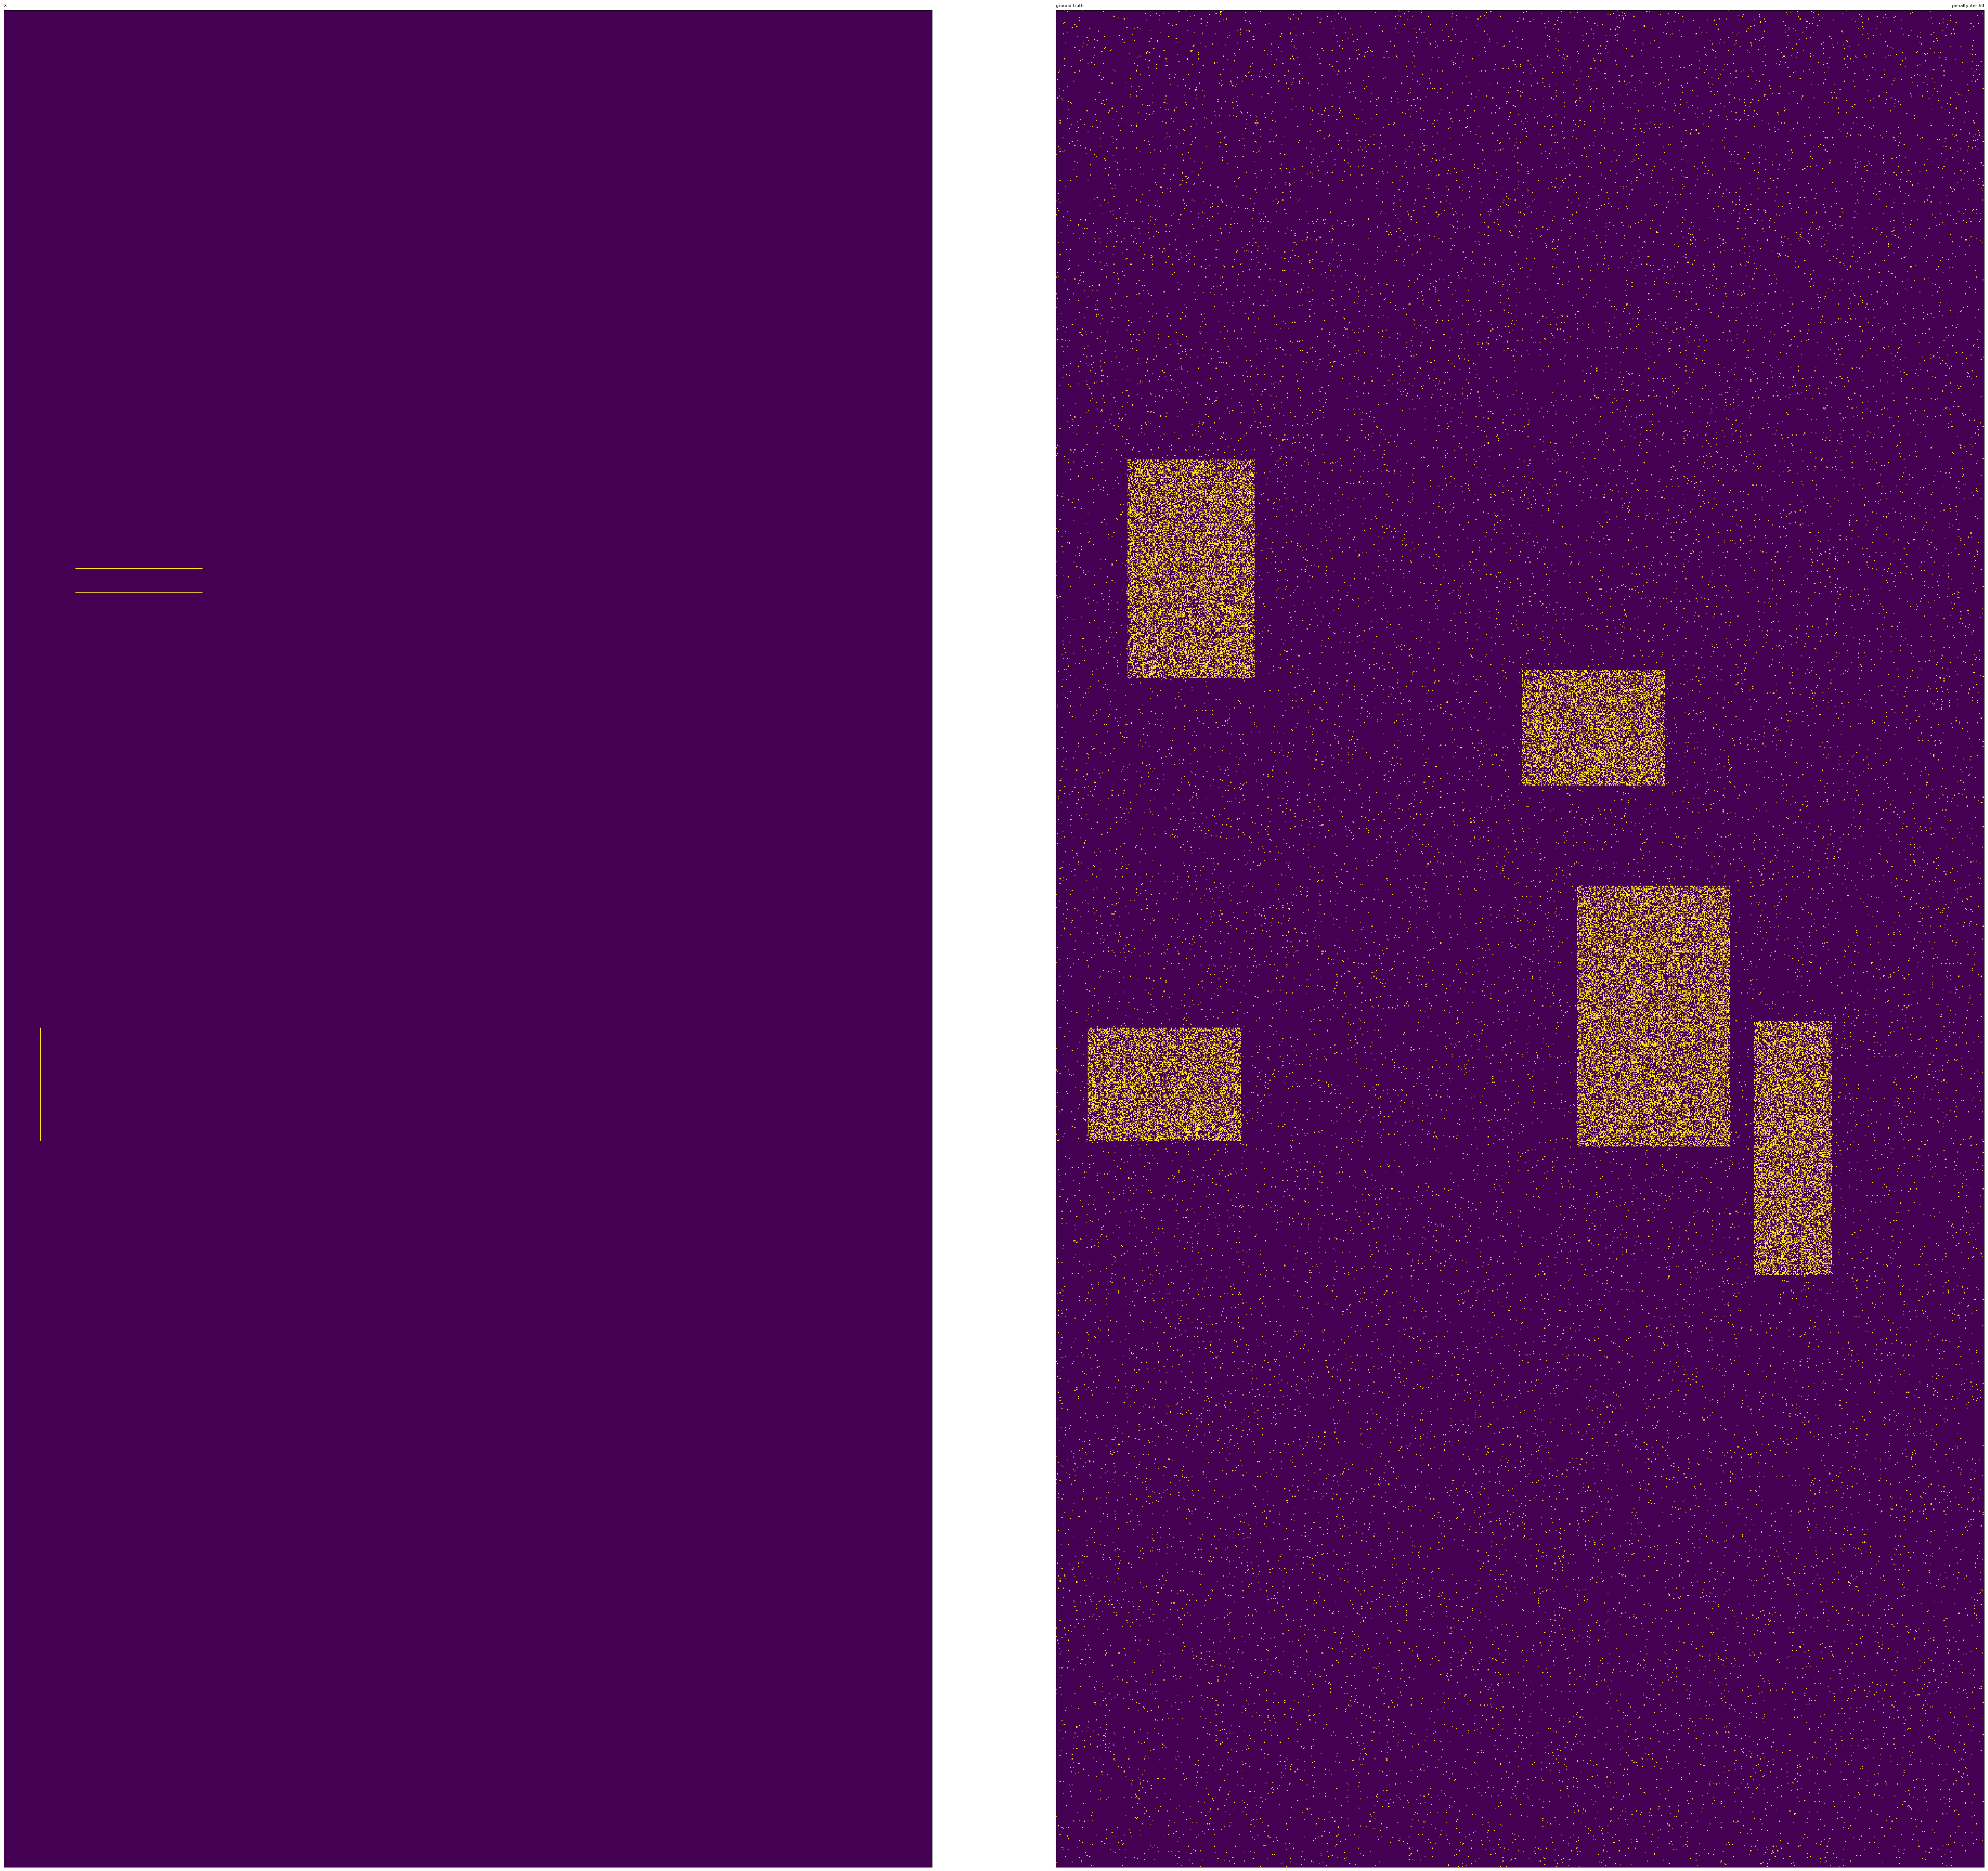

[I] iter: 60, reg: 18.167, err: 54.816, rec_err: 56459.240, reg_err: 54.816
[I] iter: 61, reg: 18.349, err: 54.398, rec_err: 56461.993, reg_err: 54.398
[I] iter: 62, reg: 18.532, err: 54.005, rec_err: 56464.668, reg_err: 54.005
[I] iter: 63, reg: 18.717, err: 53.631, rec_err: 56467.268, reg_err: 53.631
[I] iter: 64, reg: 18.905, err: 53.269, rec_err: 56469.795, reg_err: 53.269
[I] iter: 65, reg: 19.094, err: 52.917, rec_err: 56472.255, reg_err: 52.917
[I] iter: 66, reg: 19.285, err: 52.570, rec_err: 56474.654, reg_err: 52.570
[I] iter: 67, reg: 19.477, err: 52.228, rec_err: 56476.997, reg_err: 52.228
[I] iter: 68, reg: 19.672, err: 51.890, rec_err: 56479.289, reg_err: 51.890
[I] iter: 69, reg: 19.869, err: 51.557, rec_err: 56481.532, reg_err: 51.557


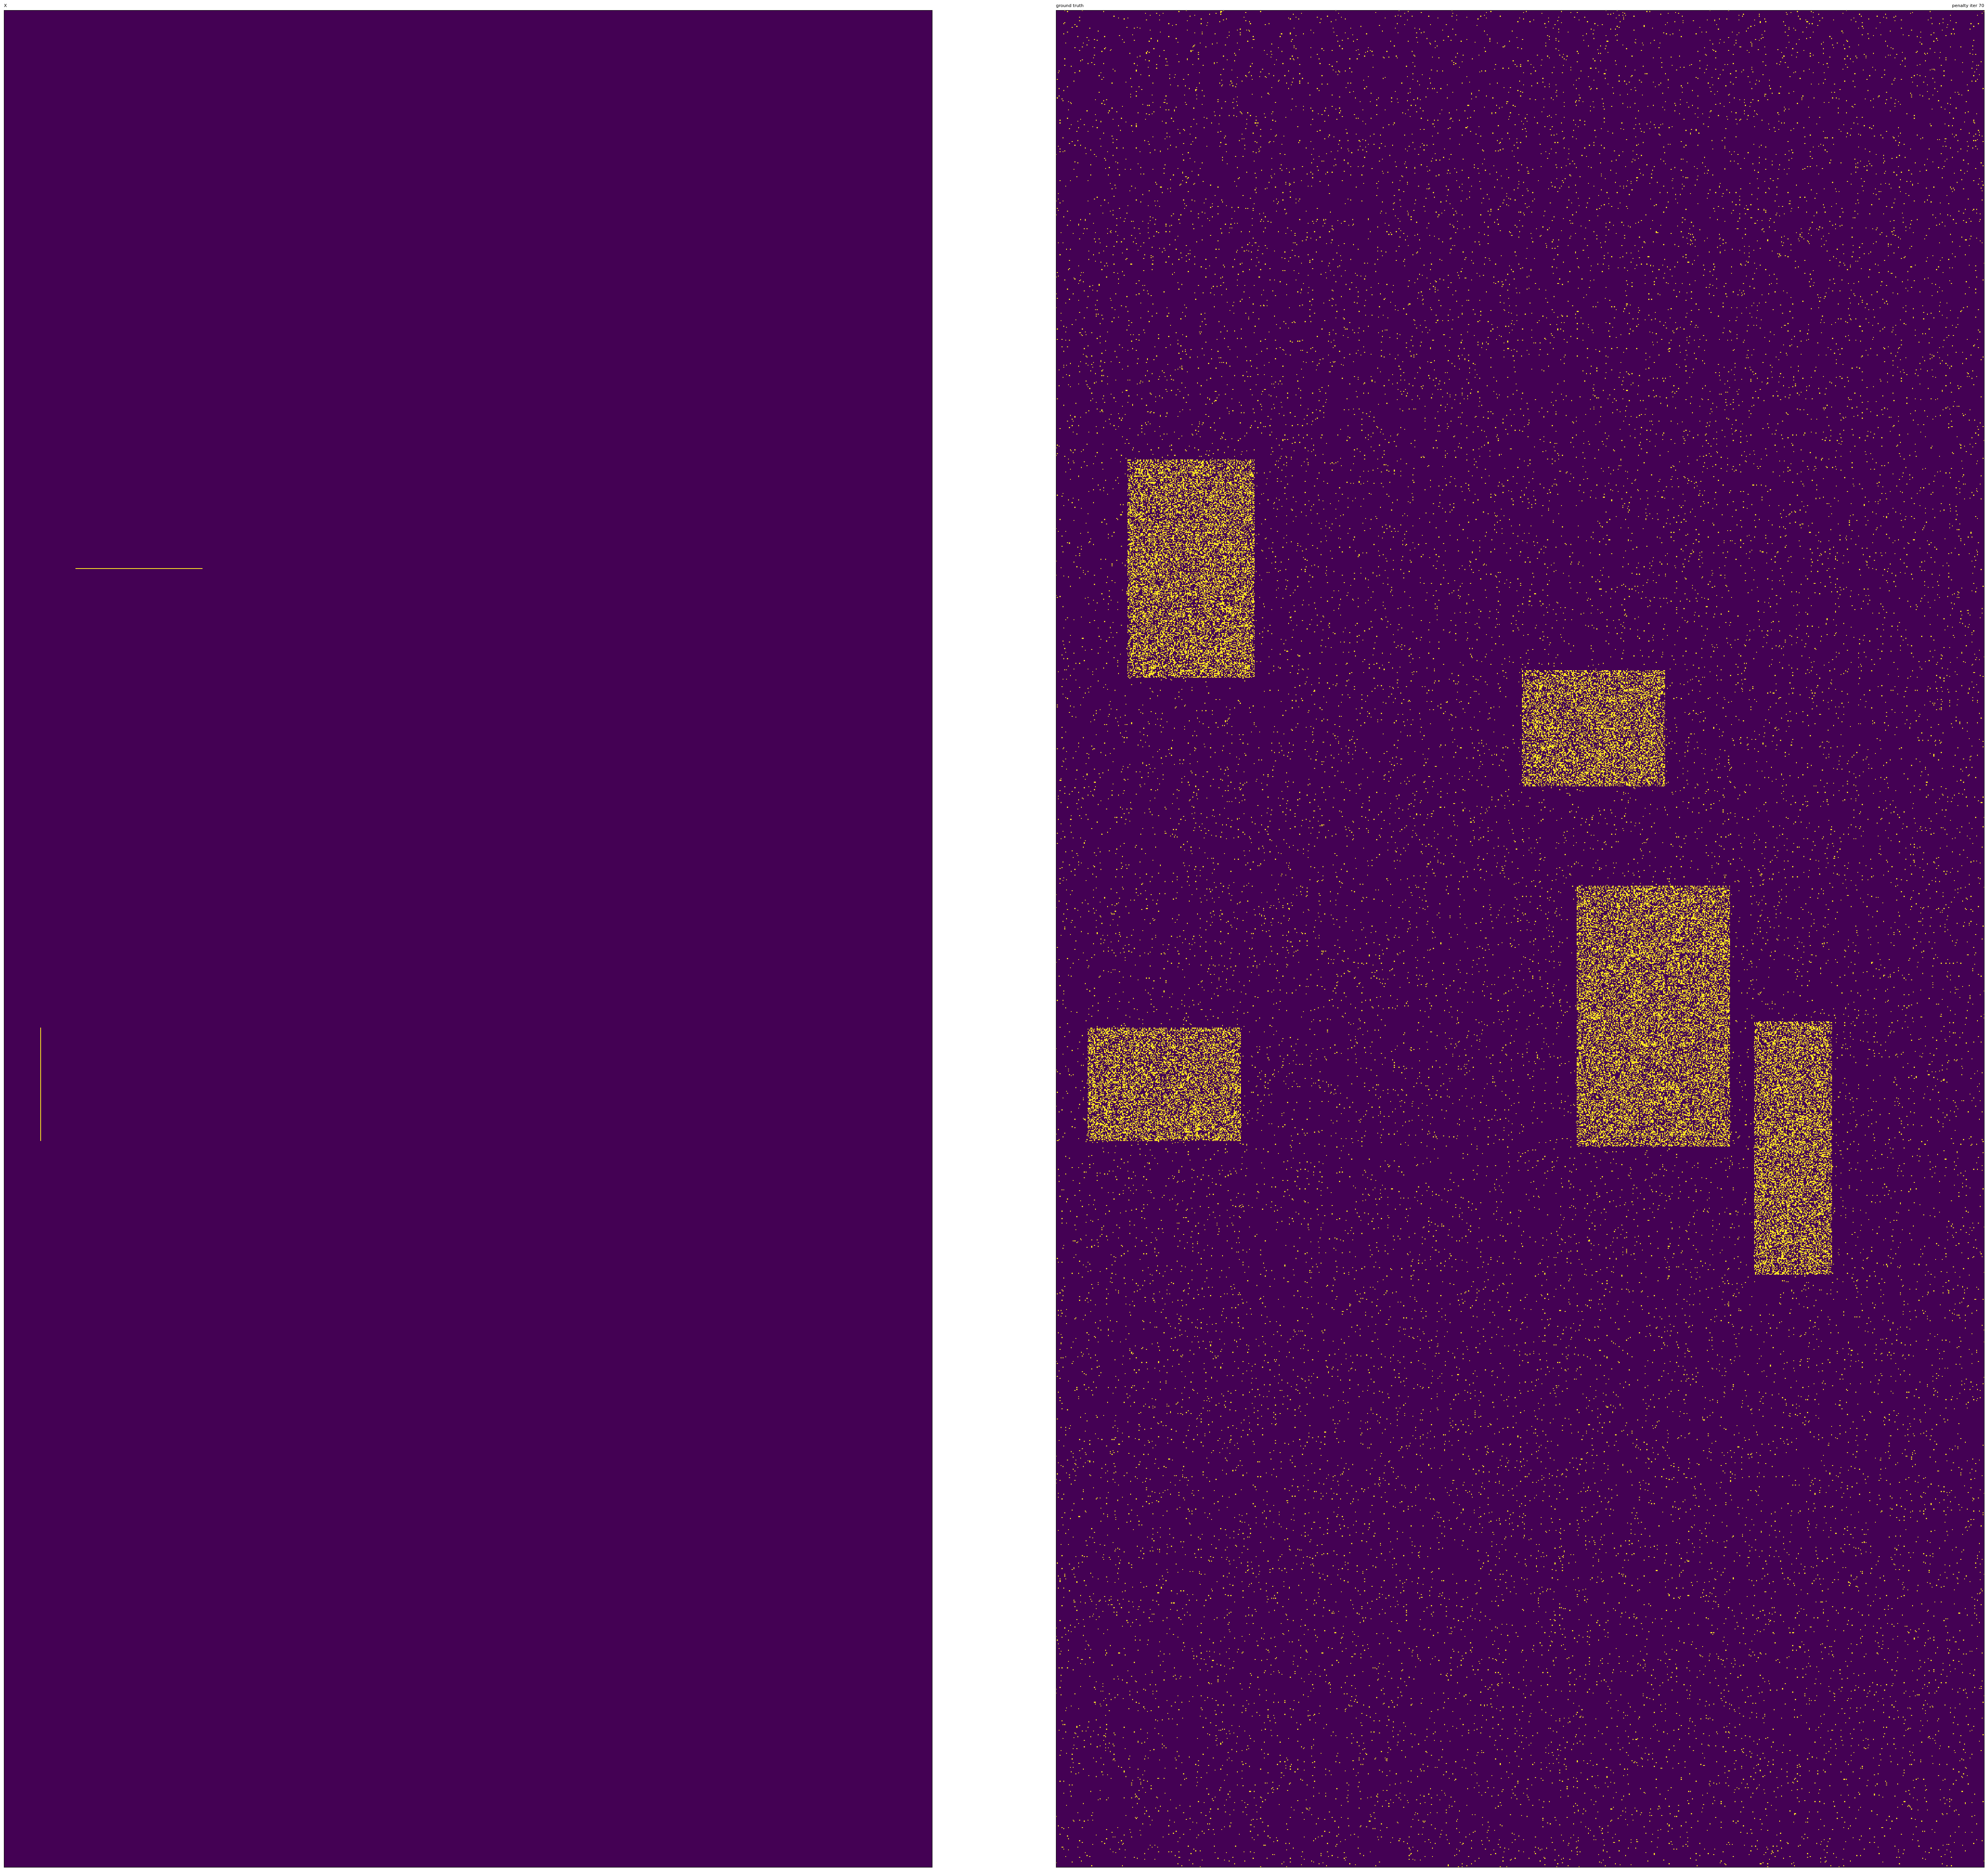

[I] iter: 70, reg: 20.068, err: 51.228, rec_err: 56483.726, reg_err: 51.228
[I] iter: 71, reg: 20.268, err: 50.906, rec_err: 56485.869, reg_err: 50.906
[I] iter: 72, reg: 20.471, err: 50.592, rec_err: 56487.959, reg_err: 50.592
[I] iter: 73, reg: 20.676, err: 50.288, rec_err: 56489.995, reg_err: 50.288
[I] iter: 74, reg: 20.882, err: 49.994, rec_err: 56491.976, reg_err: 49.994
[I] iter: 75, reg: 21.091, err: 49.711, rec_err: 56493.908, reg_err: 49.711
[I] iter: 76, reg: 21.302, err: 49.439, rec_err: 56495.802, reg_err: 49.439
[I] iter: 77, reg: 21.515, err: 49.177, rec_err: 56497.670, reg_err: 49.177
[I] iter: 78, reg: 21.730, err: 48.924, rec_err: 56499.530, reg_err: 48.924
[I] iter: 79, reg: 21.948, err: 48.681, rec_err: 56501.399, reg_err: 48.681


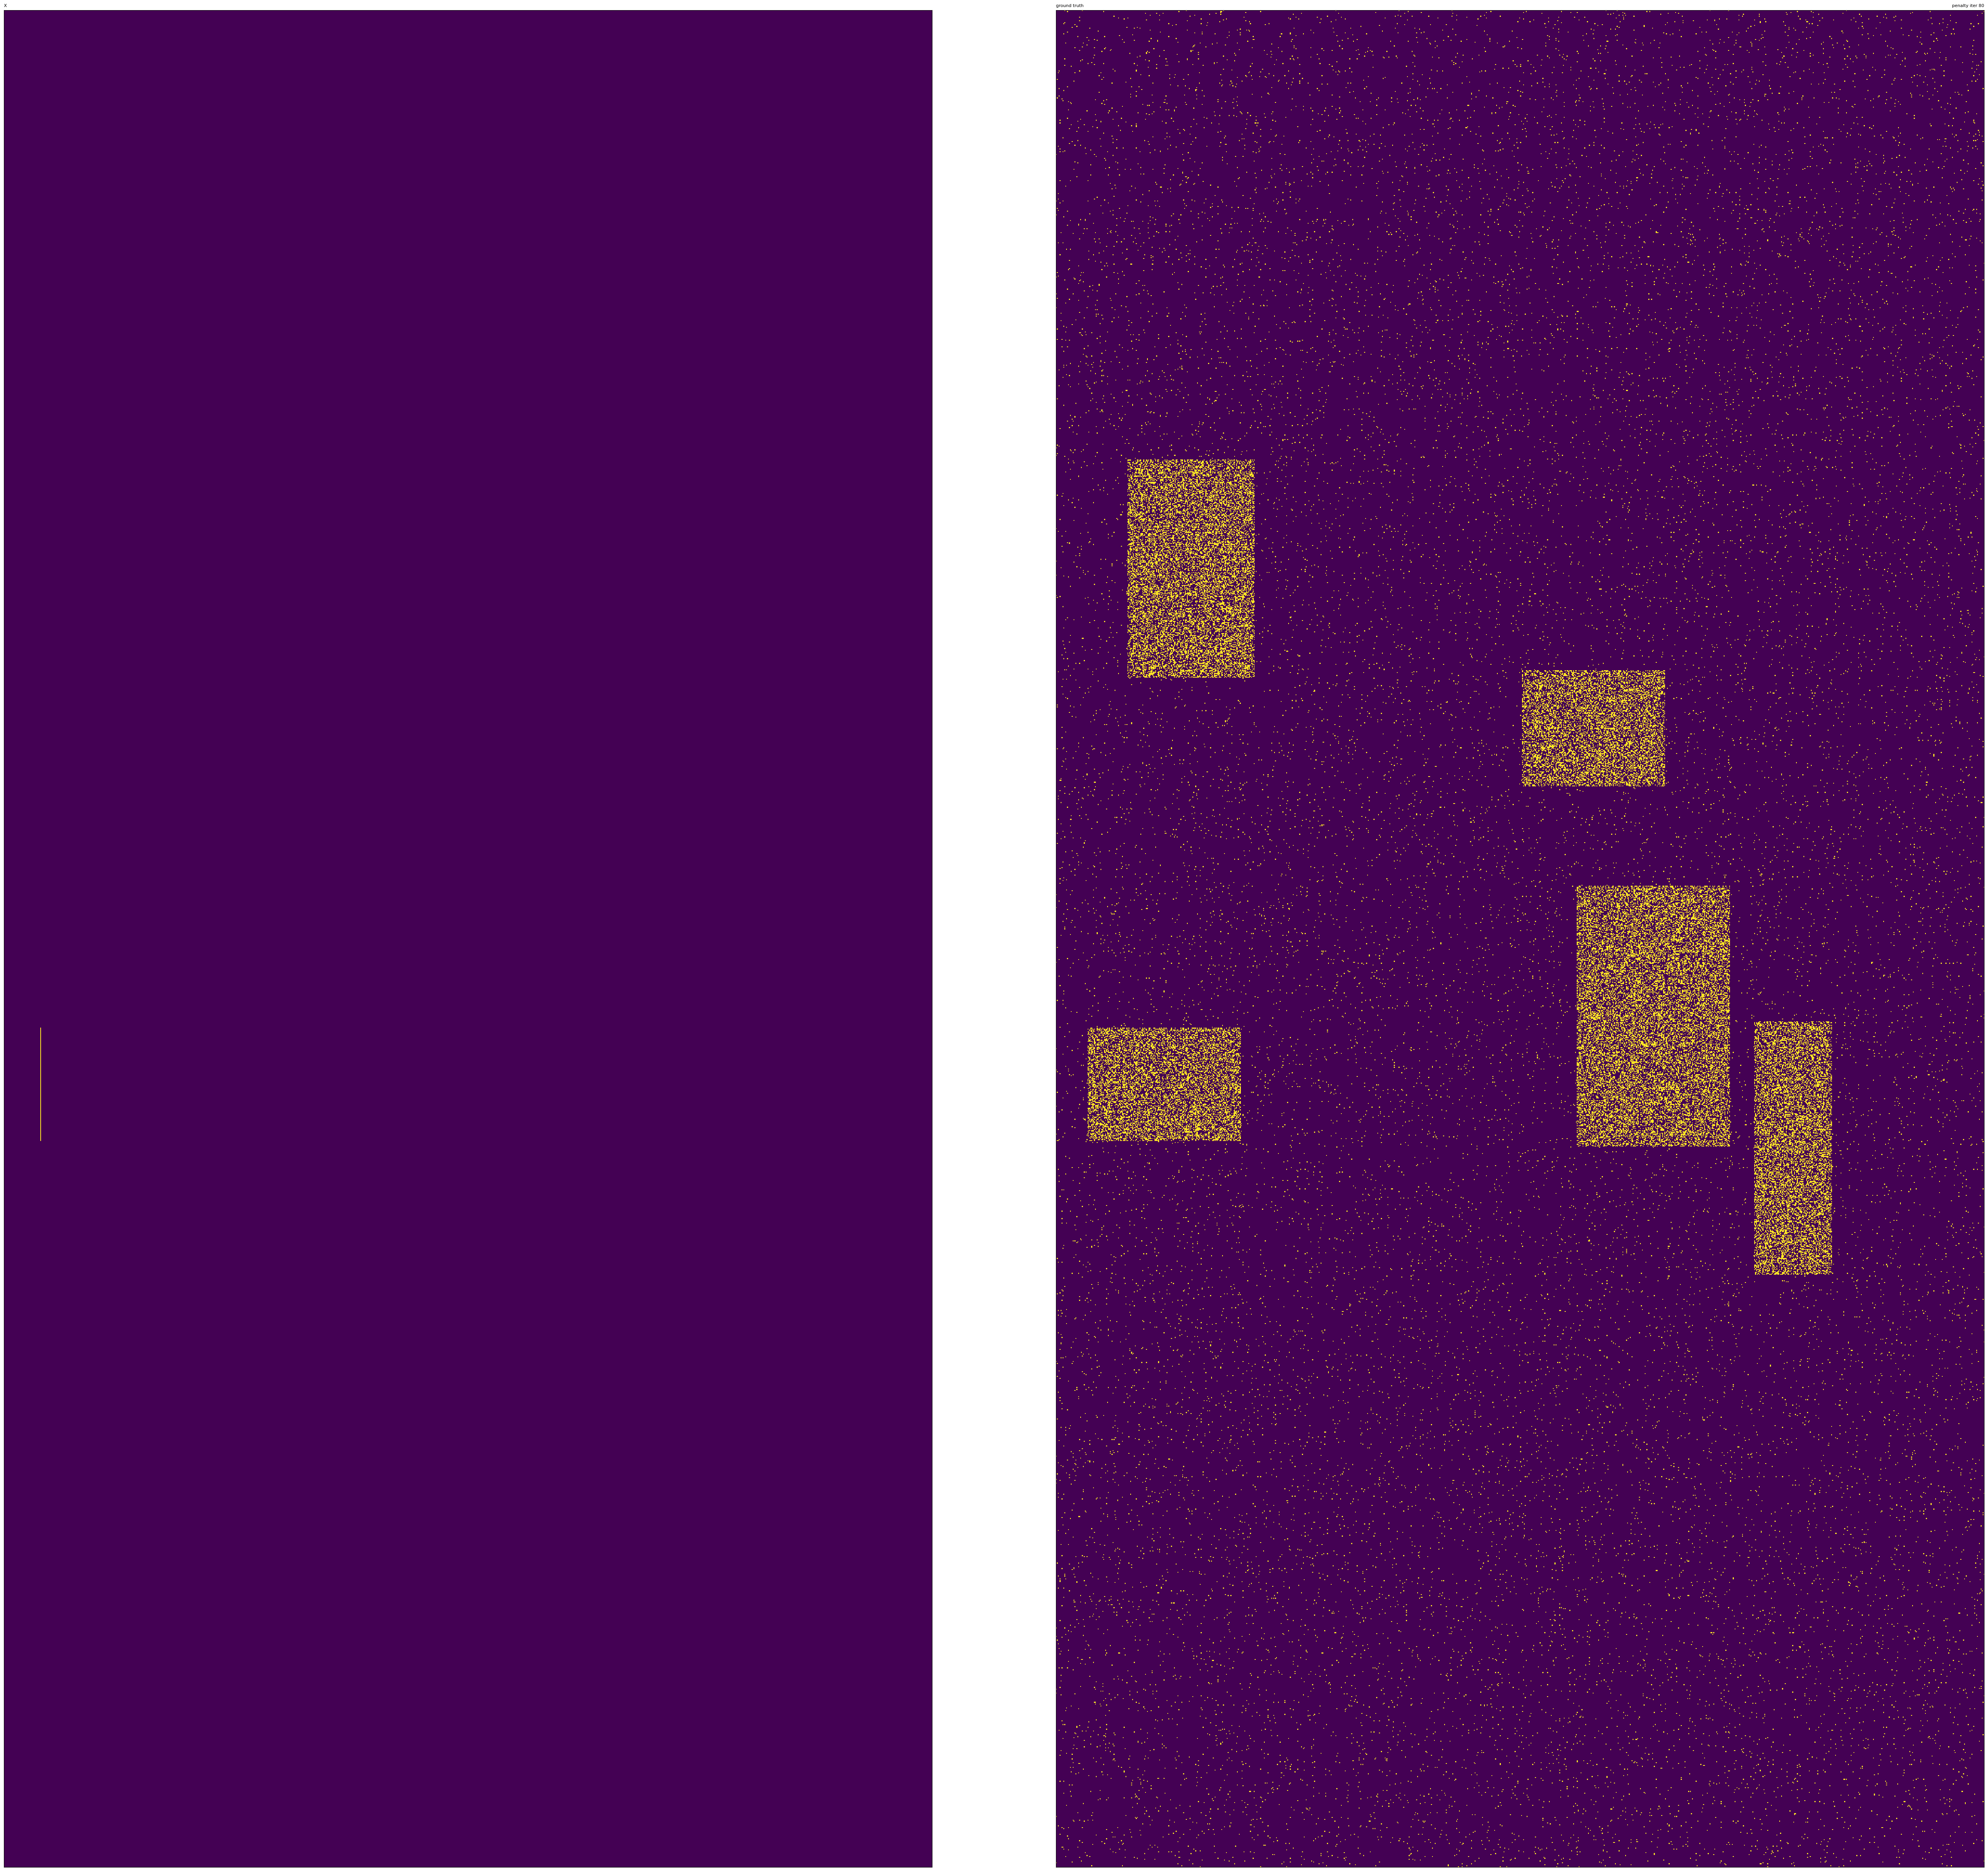

[I] iter: 80, reg: 22.167, err: 48.446, rec_err: 56503.290, reg_err: 48.446
[I] iter: 81, reg: 22.389, err: 48.220, rec_err: 56505.212, reg_err: 48.220
[I] iter: 82, reg: 22.613, err: 48.004, rec_err: 56507.168, reg_err: 48.004
[I] iter: 83, reg: 22.839, err: 47.798, rec_err: 56509.153, reg_err: 47.798
[I] iter: 84, reg: 23.067, err: 47.602, rec_err: 56511.162, reg_err: 47.602
[I] iter: 85, reg: 23.298, err: 47.416, rec_err: 56513.187, reg_err: 47.416
[I] iter: 86, reg: 23.531, err: 47.240, rec_err: 56515.219, reg_err: 47.240
[I] iter: 87, reg: 23.766, err: 47.074, rec_err: 56517.251, reg_err: 47.074
[I] iter: 88, reg: 24.004, err: 46.918, rec_err: 56519.278, reg_err: 46.918
[I] iter: 89, reg: 24.244, err: 46.770, rec_err: 56521.296, reg_err: 46.770


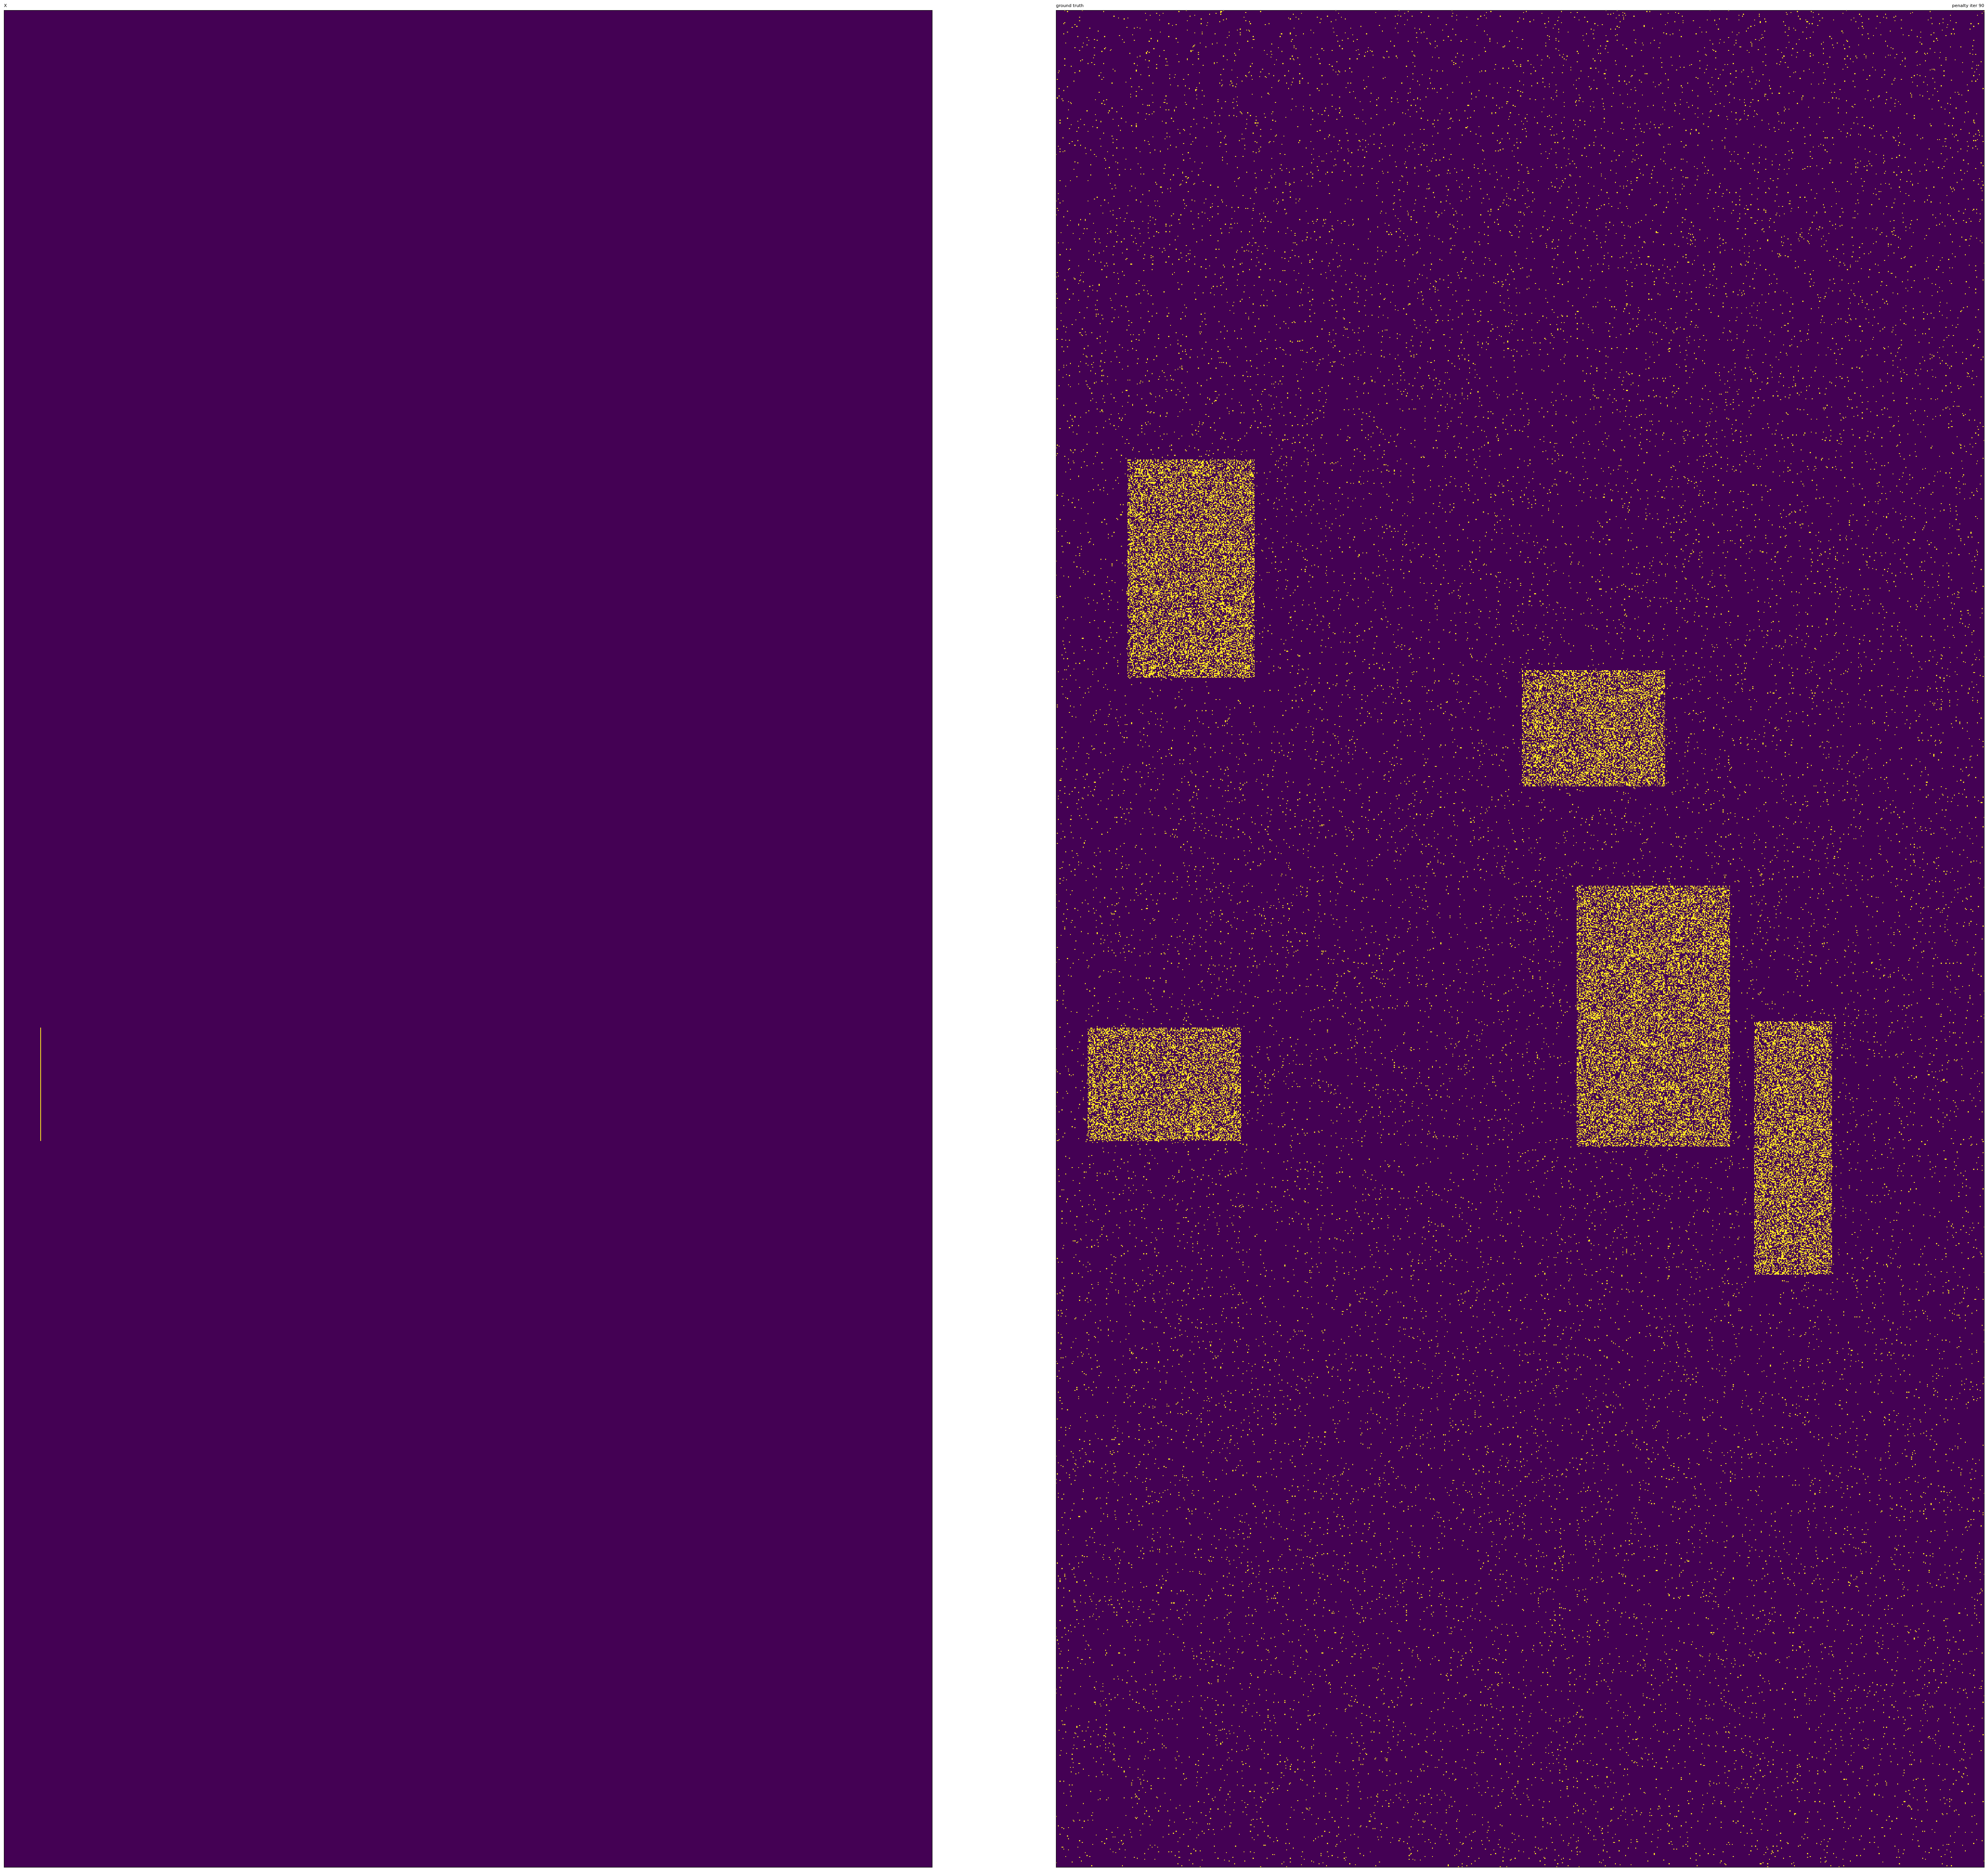

[I] iter: 90, reg: 24.486, err: 46.630, rec_err: 56523.301, reg_err: 46.630
[I] iter: 91, reg: 24.731, err: 46.499, rec_err: 56525.291, reg_err: 46.499
[I] iter: 92, reg: 24.979, err: 46.374, rec_err: 56527.262, reg_err: 46.374
[I] iter: 93, reg: 25.228, err: 46.257, rec_err: 56529.210, reg_err: 46.257
[I] iter: 94, reg: 25.481, err: 46.145, rec_err: 56531.134, reg_err: 46.145
[I] iter: 95, reg: 25.735, err: 46.040, rec_err: 56533.032, reg_err: 46.040
[I] iter: 96, reg: 25.993, err: 45.940, rec_err: 56534.904, reg_err: 45.940
[I] iter: 97, reg: 26.253, err: 45.844, rec_err: 56536.754, reg_err: 45.844
[I] iter: 98, reg: 26.515, err: 45.752, rec_err: 56538.584, reg_err: 45.752
[I] iter: 99, reg: 26.780, err: 45.663, rec_err: 56540.399, reg_err: 45.663


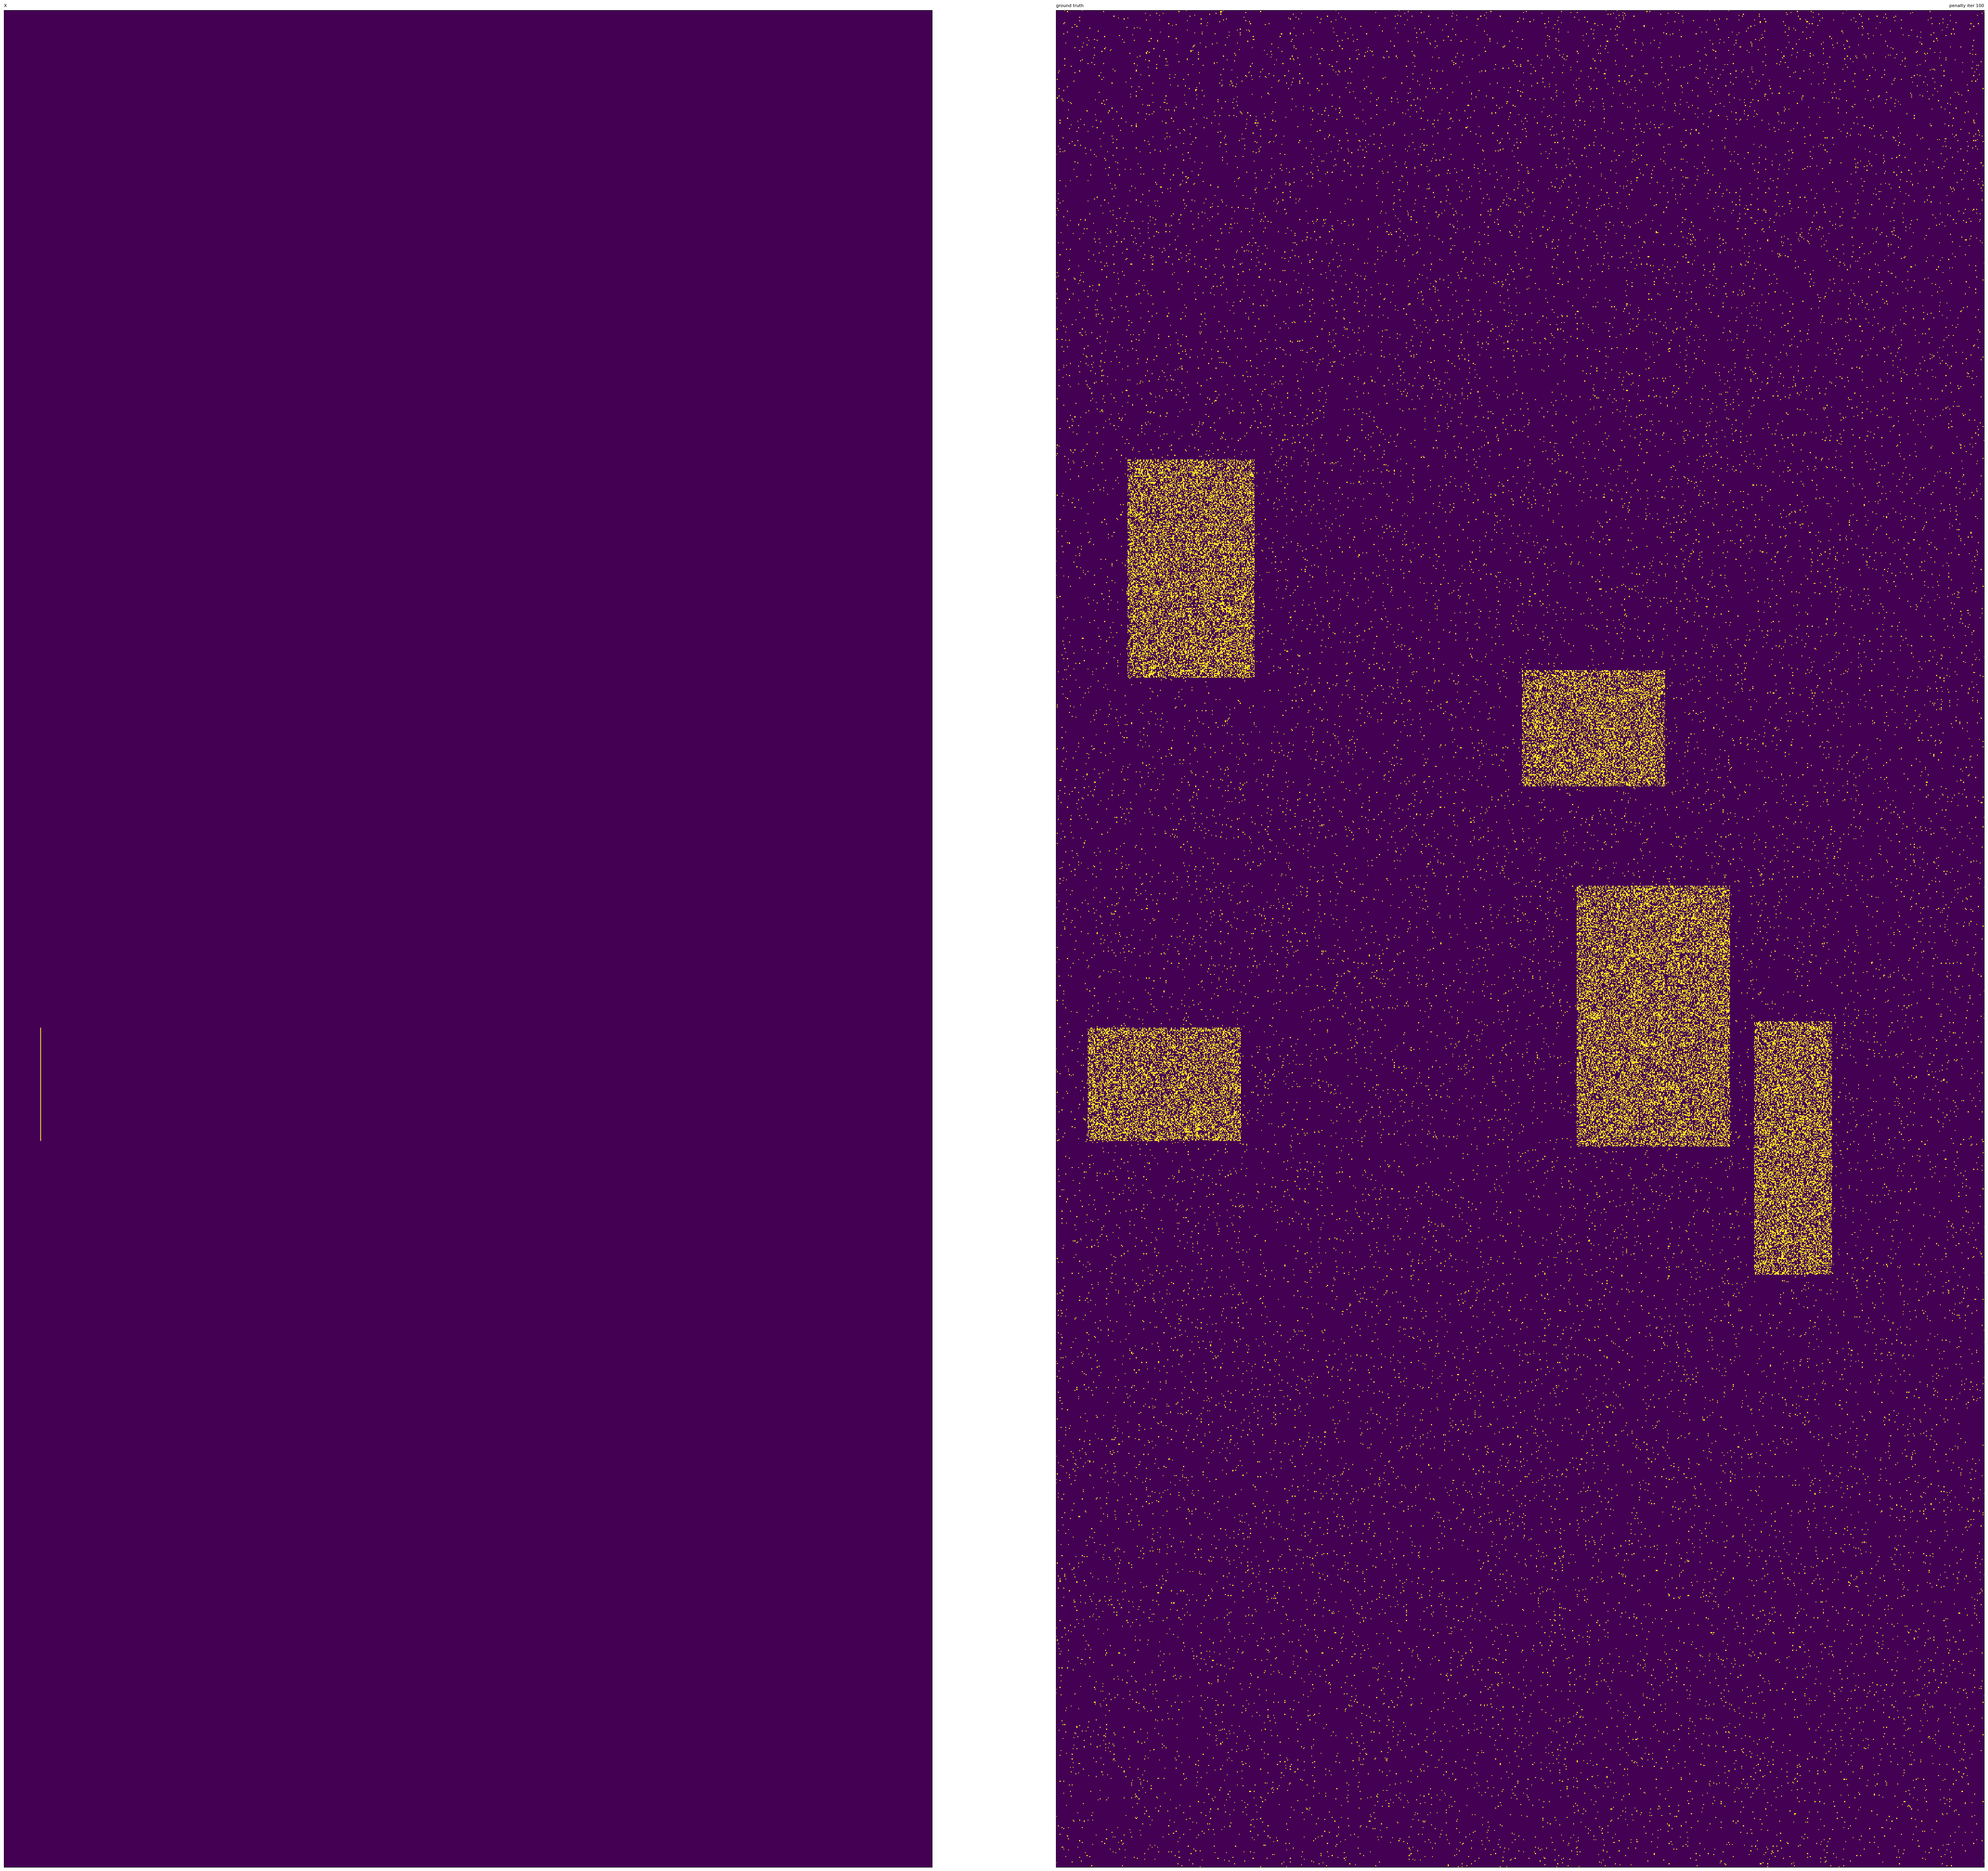

[I] iter: 100, reg: 27.048, err: 45.576, rec_err: 56542.205, reg_err: 45.576


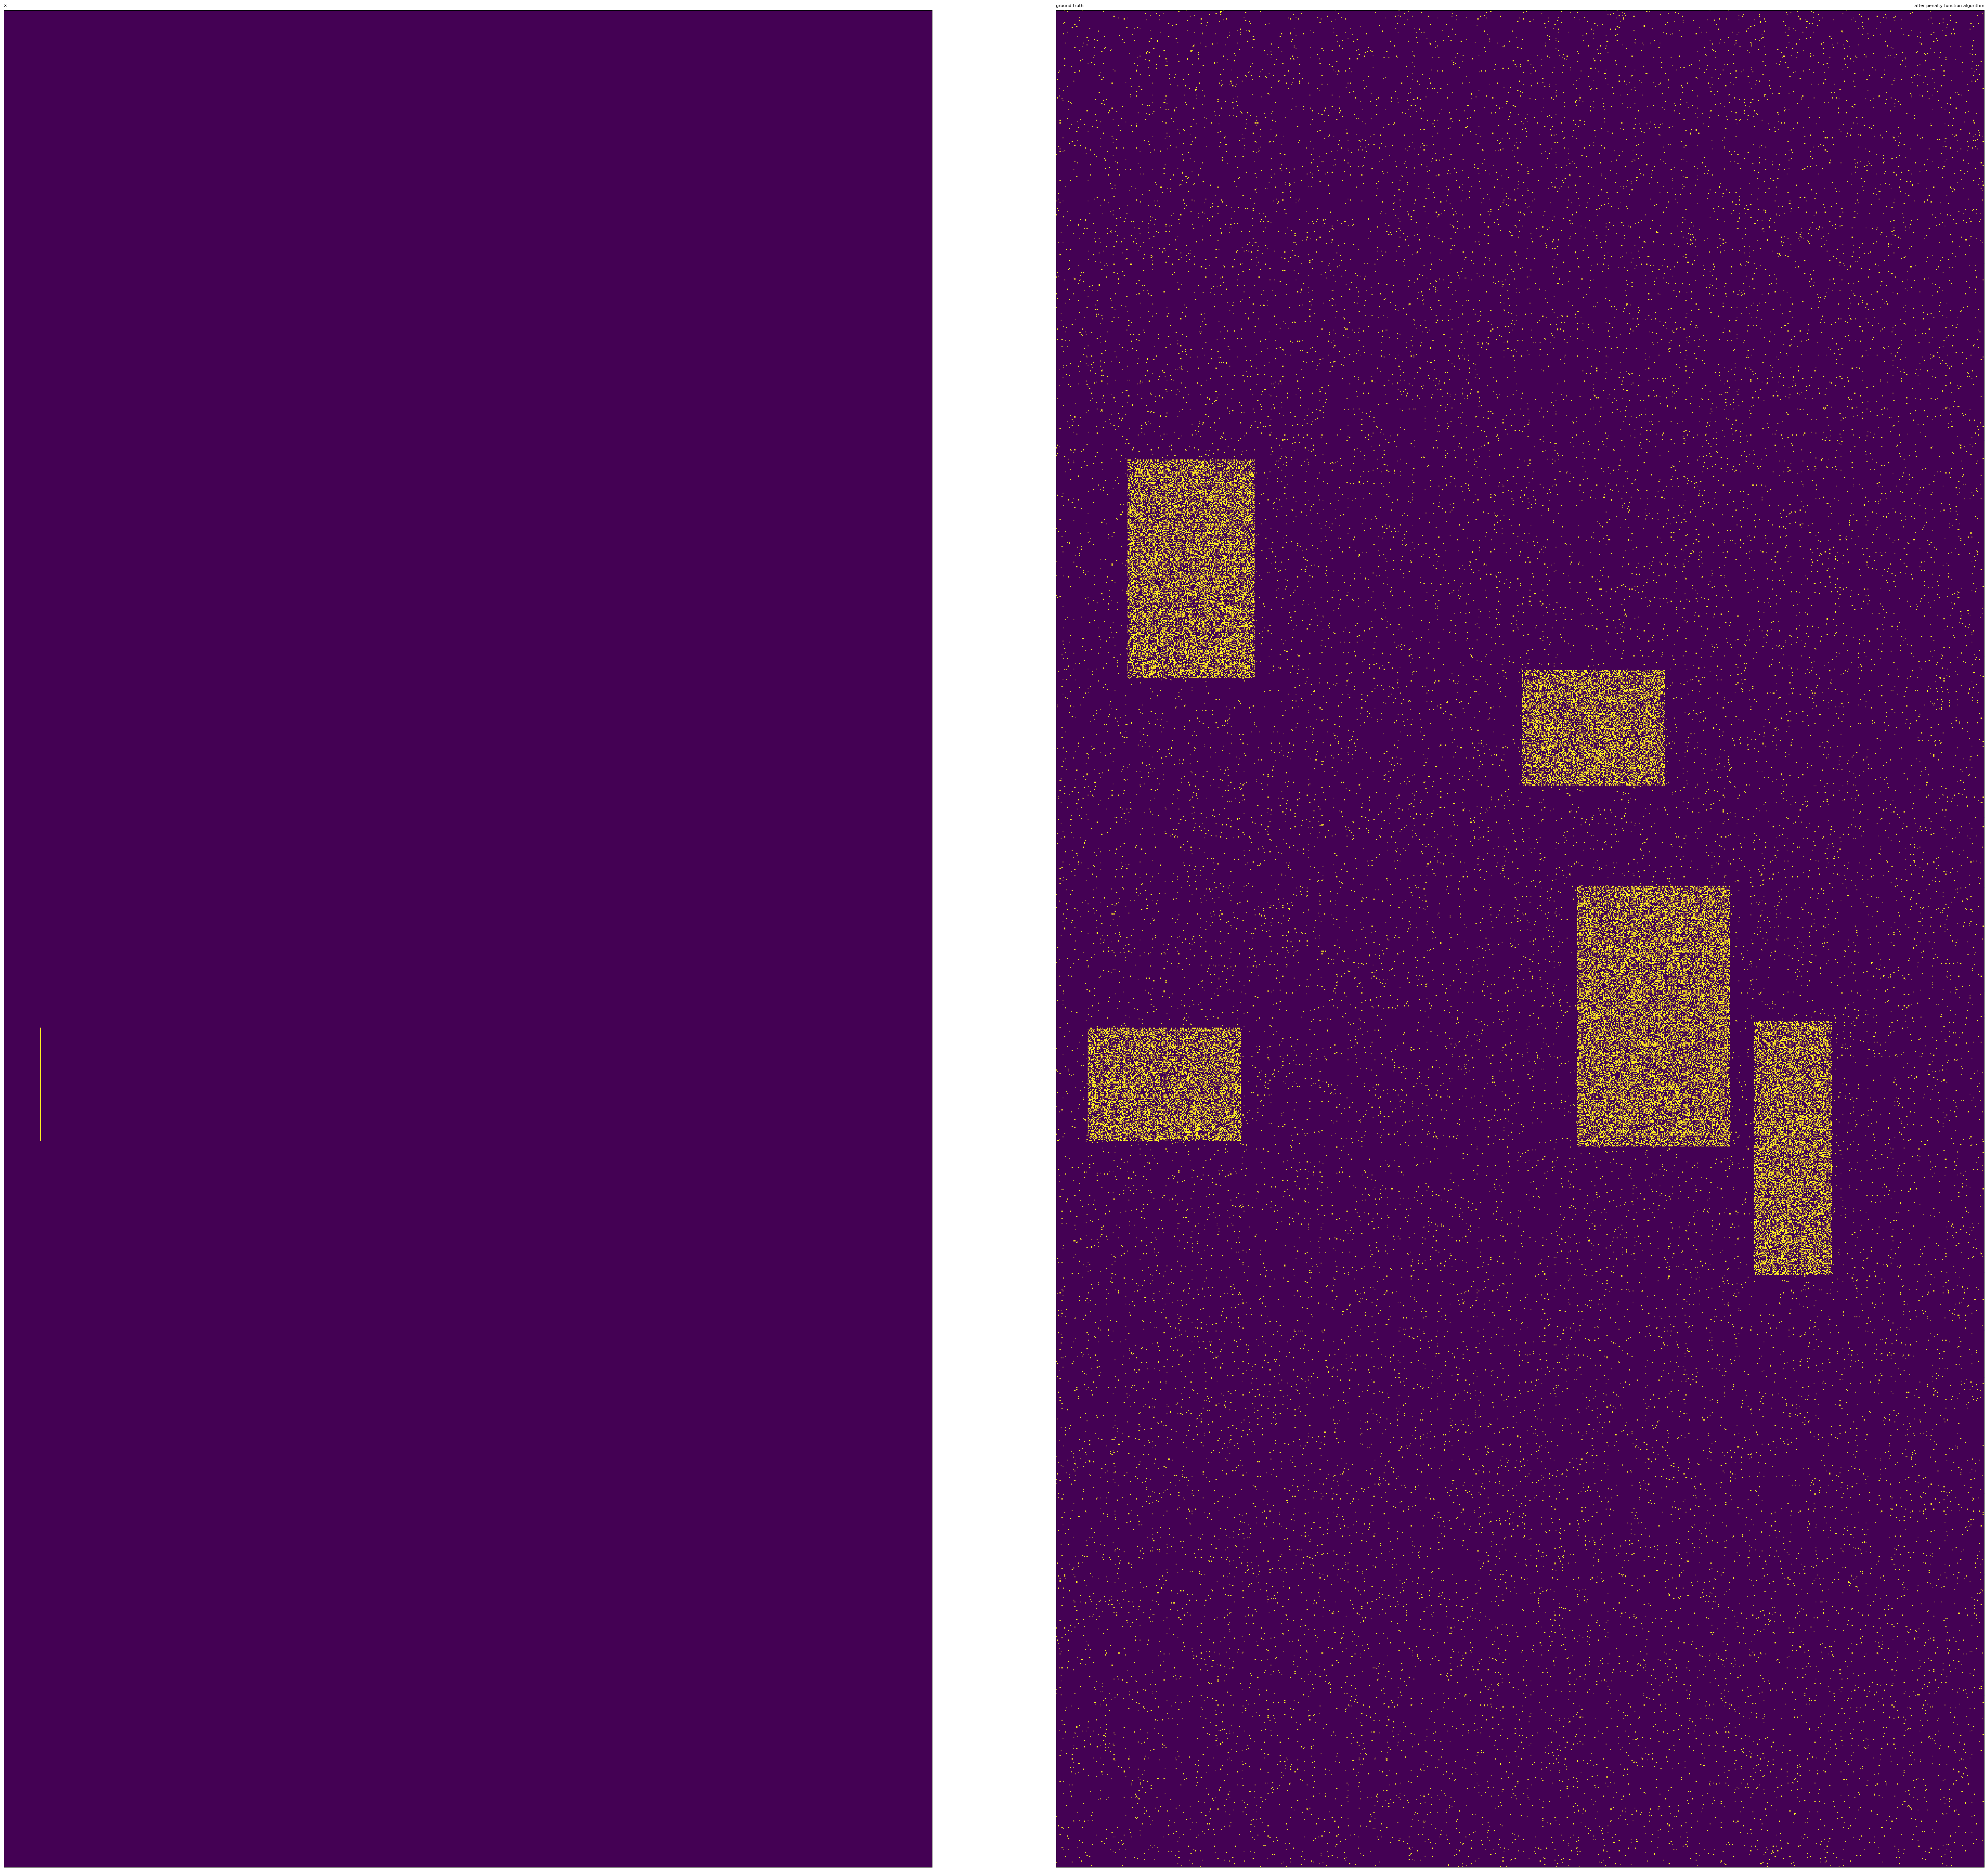

In [9]:
from models import binaryMF

n_fold = 1

for i in range(n_fold):
    fold = i + 1

    X_data.cross_validation(test_size=0.2, n_folds=5, current_fold=fold, seed=1997)
    pos_train_val_size = X_data.pos_train_size + X_data.pos_val_size
    X_data.cv_negative_sample(n_folds=n_fold,
                              current_fold=fold,
                              train_val_size=int(0.05 * pos_train_val_size),
                              test_size=int(0.05 * X_data.pos_test_size), 
                              seed=6666, type='popularity')

    ds_train = Dataset()
    ds_train.load_data(X=X_data.train_data, U=X_data.U, V=X_data.V)

    ds_val = Dataset()
    ds_val.load_data(X=X_data.val_data, U=X_data.U, V=X_data.V)

    ds_test = Dataset()
    ds_test.load_data(X=X_data.test_data, U=X_data.U, V=X_data.V)

    ds_train.summarize(title='training set {}'.format(fold), display=False, pixels=2, ordered=True)
    ds_val.summarize(title='validation set {}'.format(fold), display=False, pixels=2, ordered=True)
    ds_test.summarize(title='test set {}'.format(fold), display=False, pixels=2, ordered=True)

    # grid search
    k_list = [5]
    for k in k_list:
        bmf = binaryMF(k=k, algorithm='penalty', reg=10, reg_growth=1.01, max_iter=100)
        # bmf = binaryMF(k=k, algorithm='threshold', eps=1e-06, lamda=5, max_iter=100)
        bmf.fit(train_set=ds_train, display=True, seed=1000)
        tpr, fpr = bmf.eval(test_set=ds_val)

        # str = 'k: {}\t tau: {}\t w: {}\t tpr: {:.2f}\t fpr: {:.2f}\n'.format(k, tau, w, tpr, fpr)

        # with open('.\output\exp01.txt', "a") as f:
        #     f.write(str)